# Wind Energy Prediction and Analysis

## Importing Basic Libraries

In [60]:
# ! pip install pandas
# ! pip install numpy
# ! pip install seaborn
# ! pip install matplotlib
# ! pip install keras
# ! pip install scikit-learn
# ! pip install tensorflow




In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



import datetime
import time

%matplotlib inline
sns.set(rc = {"figure.figsize" : (8, 6)})

### Reading the dataset

In [62]:
data = pd.read_csv("../dataset/T1.csv")
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645904,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


## Data Wrangling

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


In [64]:
data.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776282,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


In [65]:
data.isnull().sum()

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

## Visualization

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


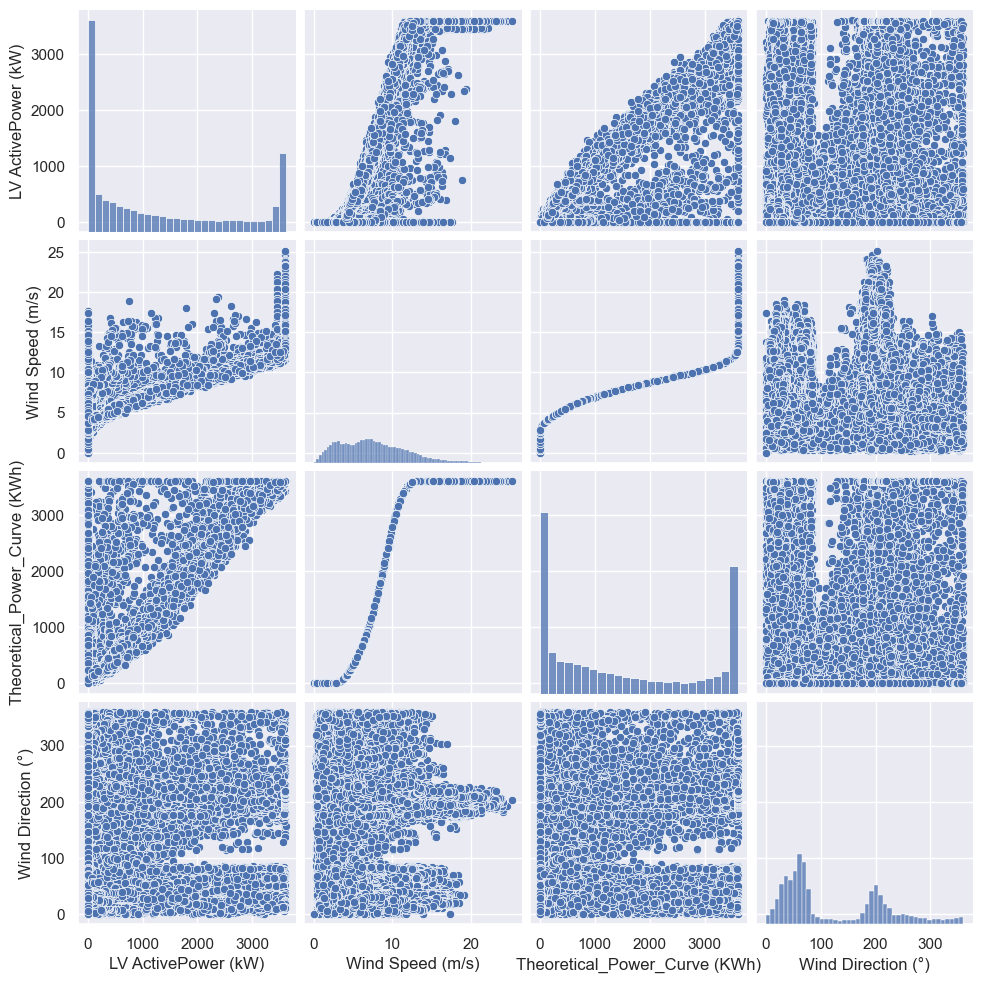

In [66]:
# Pair Plot correlation between all attributes
sns.pairplot(data)

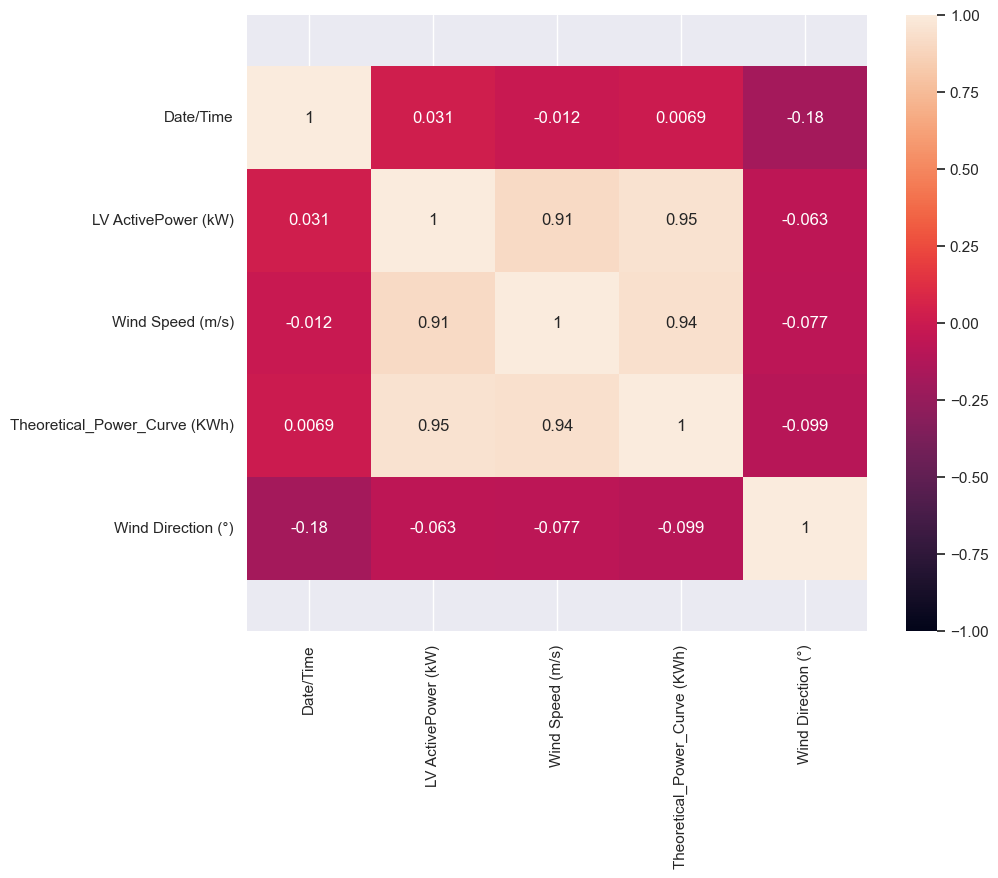

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
Date/Time,1.000000,0.030971,-0.012209,0.006900,-0.180336
LV ActivePower (kW),0.030971,1.000000,0.912774,0.949918,-0.062702
Wind Speed (m/s),-0.012209,0.912774,1.000000,0.944209,-0.077188
Theoretical_Power_Curve (KWh),0.006900,0.949918,0.944209,1.000000,-0.099076
Wind Direction (°),-0.180336,-0.062702,-0.077188,-0.099076,1.000000


In [67]:
#correlation between the values
data['Date/Time'] = pd.to_datetime(data['Date/Time'],format="%d %m %Y %H:%M")

corr = data.corr()
plt.figure(figsize=(10, 8))

ax = sns.heatmap(corr, vmin = -1, vmax = 1, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()
corr

In [68]:
# Importing a visualization library
# ! pip install windrose

### Pie Bar Chart (Wind Direction VS Wind Speed)

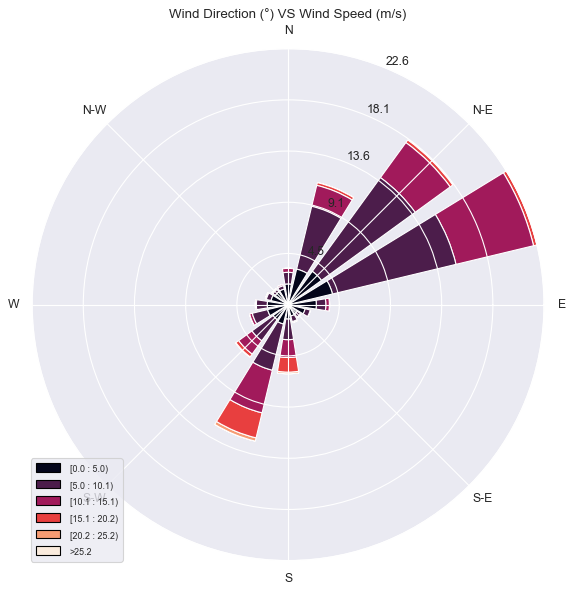

In [69]:
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(data['Wind Direction (°)'], data['Wind Speed (m/s)'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title("Wind Direction (°) VS Wind Speed (m/s)")
plt.show()

In [70]:
data['Year'] = data['Date/Time'].dt.year
data['Month'] = data['Date/Time'].dt.month
data['Day'] = data['Date/Time'].dt.day
data['Time_Hours'] = data['Date/Time'].dt.hour
data['Time_Minutes'] = data['Date/Time'].dt.minute


### KDE Plot

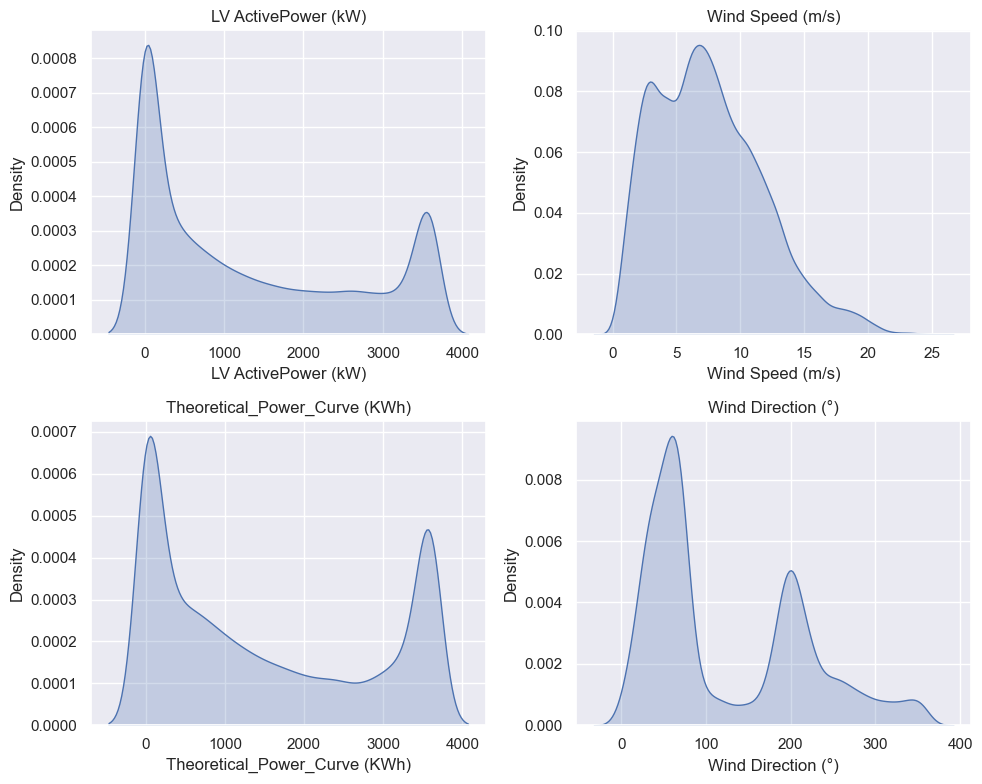

In [71]:
# Define the desired columns
target_columns = ["LV ActivePower (kW)", "Wind Speed (m/s)", "Theoretical_Power_Curve (KWh)", "Wind Direction (°)"]

# Create the plot
plt.figure(figsize=(10, 8))

# Loop through and plot each column
for i, col in enumerate(target_columns):
    # Access the column using its name
    column_data = data[col]
    
    # Create the subplot
    plt.subplot(2, 2, i + 1)

    # Plot the kernel density distribution
    sns.kdeplot(column_data, fill=True)

    # Set the title
    plt.title(col)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [72]:
# droping all the null values from the data
data = data.dropna()

## Converting the Data/Time feature in proper DateTime format

In [73]:
data["Date/Time"] = pd.to_datetime(data["Date/Time"], format = "%d %m %Y %H:%M", errors = "coerce")
data

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Year,Month,Day,Time_Hours,Time_Minutes
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,2018,1,1,0,0
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,2018,1,1,0,10
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,2018,1,1,0,20
3,2018-01-01 00:30:00,419.645904,5.659674,516.127569,271.258087,2018,1,1,0,30
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,2018,1,1,0,40
...,...,...,...,...,...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724,2018,12,31,23,10
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599,2018,12,31,23,20
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500,2018,12,31,23,30
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,84.297913,2018,12,31,23,40


### Line Graph of DateTime VS Target variable

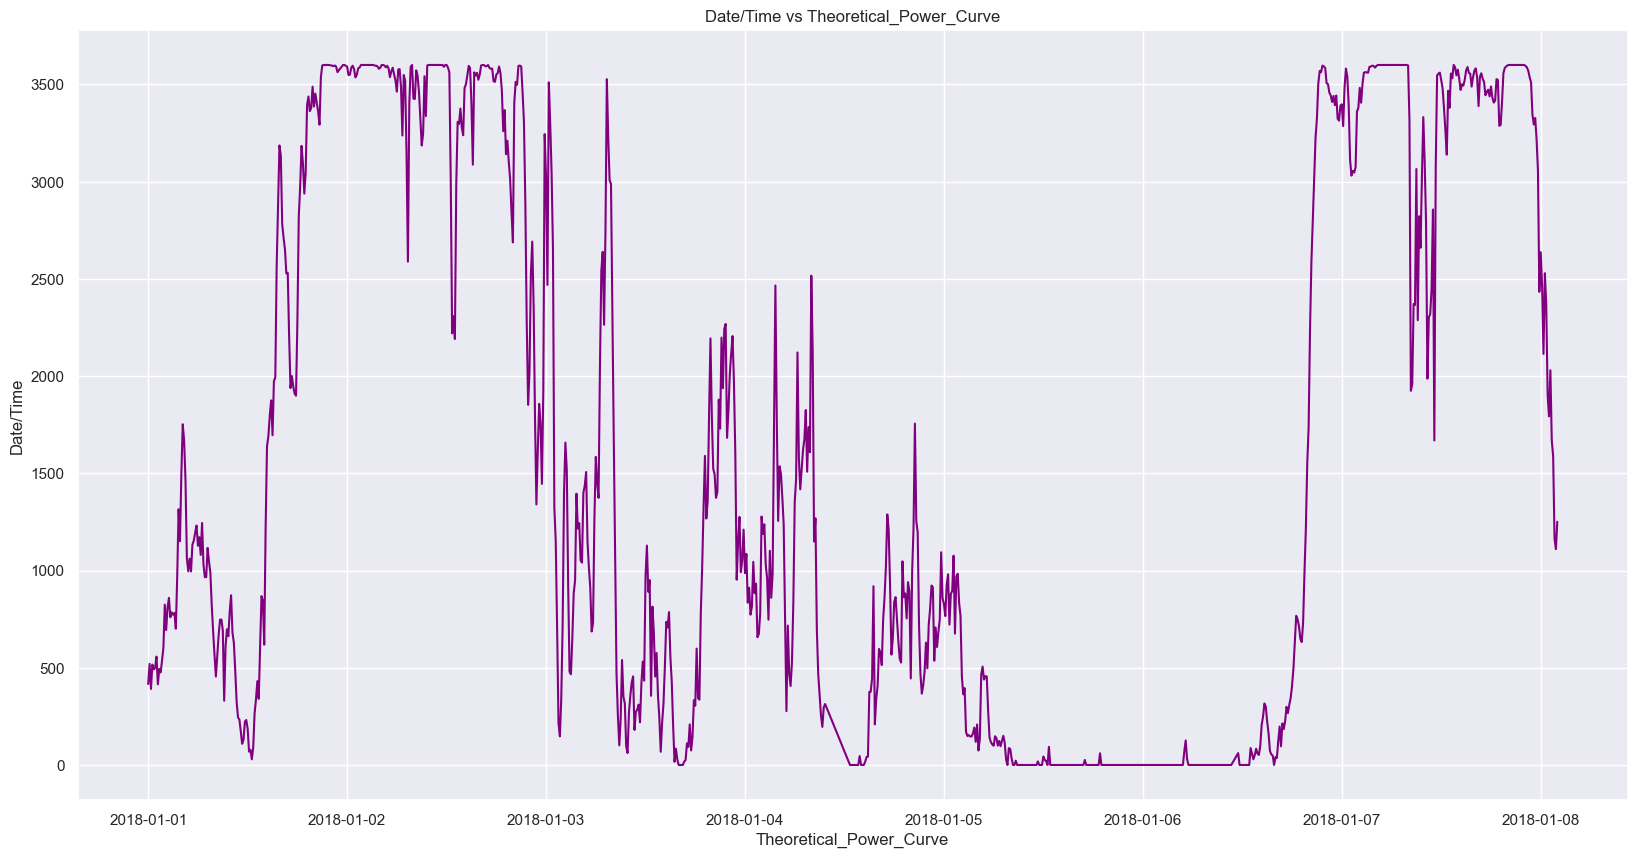

In [74]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20,10))

# Add x-axis and y-axis
ax.plot(data['Date/Time'][0:1000],
        data['Theoretical_Power_Curve (KWh)'][0:1000],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Theoretical_Power_Curve",
       ylabel="Date/Time",
       title="Date/Time vs Theoretical_Power_Curve")

plt.show()

In [75]:
# Droping all the irrelavent features that dosent affect the target variable.
cols = ["Wind Direction (°)", 'Year', 'Month', "Day", "Time_Hours", "Time_Minutes" ]
data = data.drop(cols, axis=1)
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016
3,2018-01-01 00:30:00,419.645904,5.659674,516.127569
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972


In [76]:
df = data.copy()

# Building the LSTM model

In [77]:



from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow import keras

from math import sqrt
from matplotlib import pyplot
import numpy as np
import pandas as pd

In [78]:
# converting the Data/Time as the index for proper shape of the input.
df = df.set_index('Date/Time')

In [79]:
# Hardcode all variables
batch_size_exp = 1
epoch_exp = 15
neurons_exp = 10
predict_values_exp = 10000
lag_exp=24

In [80]:
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

In [81]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

In [82]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [83]:
# scale train and test data to [-1, 1]
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled

In [84]:
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = np.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

In [85]:
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    
    model = tf.keras.models.Sequential()
    
    # Use LSTM layer with CuDNN backend if available
    if tf.test.is_gpu_available(cuda_only=True):
        model.add(tf.keras.layers.LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    else:
        model.add(tf.keras.layers.LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True, implementation=2))
    
    model.add(tf.keras.layers.Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
        model.reset_states()
    
    # Print model summary after training
    print(model.summary())
    
    return model

In [86]:
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    #print(X)
    yhat = model.predict(X, batch_size=1)
    return yhat[0,0]

In [87]:
'''Drop all the features as we will not be having any in production'''
del df['LV ActivePower (kW)']
del df['Wind Speed (m/s)']
df.head()

,Theoretical_Power_Curve (KWh)
Date/Time,
2018-01-01 00:00:00,416.328908
2018-01-01 00:10:00,519.917511
2018-01-01 00:20:00,390.900016
2018-01-01 00:30:00,516.127569
2018-01-01 00:40:00,491.702972


In [88]:
for i in range(0,10):
  df = df[:-1]
df.tail()

,Theoretical_Power_Curve (KWh)
Date/Time,
2018-12-31 21:30:00,1811.263260
2018-12-31 21:40:00,1787.100338
2018-12-31 21:50:00,2777.504103
2018-12-31 22:00:00,3025.199012
2018-12-31 22:10:00,3161.693967


In [89]:
# transform data to be stationary
raw_values = df.values
diff_values = difference(raw_values, 1)

In [90]:
# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, lag_exp)
supervised_values = supervised.values

In [91]:
# split data into train and test-sets
train, test = supervised_values[0:-predict_values_exp], supervised_values[-predict_values_exp:]

In [92]:
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

In [93]:
# fit the model
lstm_model = fit_lstm(train_scaled, batch_size_exp, epoch_exp, neurons_exp)

40519/40519 [==============================] - 90s 2ms/step - loss: 0.0054
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (1, 10)                   1400      
                                                                 
 dense_1 (Dense)             (1, 1)                    11        
                                                                 
Total params: 1411 (5.51 KB)
Trainable params: 1411 (5.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [94]:
# walk-forward validation on the test data
predictions = list()
expectations = list()
predictions_plot = list()
expectations_plot = list()
test_pred = list()
for i in range(len(test_scaled)):
    # make one-step forecast
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
    yhat = forecast_lstm(lstm_model, 1, X)#batch_size_exp to 1
    '''# Start Debug prints
    print("X: %", X)
    print("yhat: %", yhat)
    # End Debug prints'''
    # Replacing value in test scaled with the predicted value.
    test_pred = [yhat] + test_pred 
    if len(test_pred) > lag_exp+1:
        test_pred = test_pred[:-1]
    if i+1<len(test_scaled):
        if i+1 > lag_exp+1:
            test_scaled[i+1] = test_pred
        else:
            test_scaled[i+1] = np.concatenate((test_pred, test_scaled[i+1, i+1:]),axis=0)

    # invert scaling
    yhat = invert_scale(scaler, X, yhat)
    # invert differencing
    yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
    # store forecast
    expected = raw_values[len(train) + i + 1]
    predictions_plot.append(yhat)
    expectations_plot.append(expected)
    if expected != 0:
        predictions.append(yhat)
        expectations.append(expected)
    print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

1/1 [==============================] - 0s 411ms/step
Hour=1, Predicted=145.560604, Expected=317.577035
1/1 [==============================] - 0s 32ms/step
Hour=2, Predicted=304.508643, Expected=156.700558
1/1 [==============================] - 0s 24ms/step
Hour=3, Predicted=150.664703, Expected=56.269793
1/1 [==============================] - 0s 16ms/step
Hour=4, Predicted=53.084305, Expected=46.746482
1/1 [==============================] - 0s 20ms/step
Hour=5, Predicted=40.362655, Expected=106.925565
1/1 [==============================] - 0s 24ms/step
Hour=6, Predicted=105.985112, Expected=435.764395
1/1 [==============================] - 0s 16ms/step
Hour=7, Predicted=435.689665, Expected=209.143151
1/1 [==============================] - 0s 24ms/step
Hour=8, Predicted=201.647368, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=9, Predicted=-0.720384, Expected=0.000000
1/1 [==============================] - 0s 16ms/step
Hour=10, Predicted=-0.563844, Expected

1/1 [==============================] - 0s 24ms/step
Hour=83, Predicted=-0.620646, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=84, Predicted=-0.621278, Expected=26.439302
1/1 [==============================] - 0s 24ms/step
Hour=85, Predicted=25.818305, Expected=39.985328
1/1 [==============================] - 0s 16ms/step
Hour=86, Predicted=39.364204, Expected=19.093120
1/1 [==============================] - 0s 24ms/step
Hour=87, Predicted=18.471183, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=88, Predicted=-0.621644, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=89, Predicted=-0.621458, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=90, Predicted=-0.622033, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=91, Predicted=-0.621845, Expected=30.946806
1/1 [==============================] - 0s 25ms/step
Hour=92, Predicted=30.325159, Expected=224.0

1/1 [==============================] - 0s 16ms/step
Hour=163, Predicted=721.121426, Expected=1023.893011
1/1 [==============================] - 0s 24ms/step
Hour=164, Predicted=1023.272566, Expected=1191.549291
1/1 [==============================] - 0s 24ms/step
Hour=165, Predicted=1190.928846, Expected=1073.980938
1/1 [==============================] - 0s 16ms/step
Hour=166, Predicted=1073.360493, Expected=1128.449444
1/1 [==============================] - 0s 20ms/step
Hour=167, Predicted=1127.828999, Expected=1219.723777
1/1 [==============================] - 0s 25ms/step
Hour=168, Predicted=1219.103332, Expected=1489.026309
1/1 [==============================] - 0s 24ms/step
Hour=169, Predicted=1488.405864, Expected=1216.837260
1/1 [==============================] - 0s 24ms/step
Hour=170, Predicted=1216.216815, Expected=1187.448259
1/1 [==============================] - 0s 24ms/step
Hour=171, Predicted=1186.827814, Expected=1051.061626
1/1 [==============================] - 0s 25ms/

1/1 [==============================] - 0s 25ms/step
Hour=241, Predicted=800.556212, Expected=860.062760
1/1 [==============================] - 0s 24ms/step
Hour=242, Predicted=859.442315, Expected=495.201322
1/1 [==============================] - 0s 16ms/step
Hour=243, Predicted=494.580877, Expected=529.949754
1/1 [==============================] - 0s 24ms/step
Hour=244, Predicted=529.329308, Expected=472.894767
1/1 [==============================] - 0s 24ms/step
Hour=245, Predicted=472.274323, Expected=367.263658
1/1 [==============================] - 0s 24ms/step
Hour=246, Predicted=366.643213, Expected=259.777106
1/1 [==============================] - 0s 24ms/step
Hour=247, Predicted=259.156660, Expected=750.537087
1/1 [==============================] - 0s 24ms/step
Hour=248, Predicted=749.916642, Expected=634.143321
1/1 [==============================] - 0s 19ms/step
Hour=249, Predicted=633.522876, Expected=709.092907
1/1 [==============================] - 0s 24ms/step
Hour=250, Pr

1/1 [==============================] - 0s 16ms/step
Hour=320, Predicted=703.313372, Expected=869.175667
1/1 [==============================] - 0s 24ms/step
Hour=321, Predicted=868.555222, Expected=969.903556
1/1 [==============================] - 0s 20ms/step
Hour=322, Predicted=969.283113, Expected=735.306908
1/1 [==============================] - 0s 24ms/step
Hour=323, Predicted=734.686463, Expected=751.644538
1/1 [==============================] - 0s 24ms/step
Hour=324, Predicted=751.024093, Expected=773.078561
1/1 [==============================] - 0s 24ms/step
Hour=325, Predicted=772.458116, Expected=933.708309
1/1 [==============================] - 0s 24ms/step
Hour=326, Predicted=933.087864, Expected=822.378111
1/1 [==============================] - 0s 24ms/step
Hour=327, Predicted=821.757666, Expected=850.507420
1/1 [==============================] - 0s 16ms/step
Hour=328, Predicted=849.886975, Expected=969.349326
1/1 [==============================] - 0s 24ms/step
Hour=329, Pr

1/1 [==============================] - 0s 25ms/step
Hour=398, Predicted=1731.231488, Expected=1335.490834
1/1 [==============================] - 0s 24ms/step
Hour=399, Predicted=1334.870389, Expected=1178.638325
1/1 [==============================] - 0s 24ms/step
Hour=400, Predicted=1178.017880, Expected=1546.949435
1/1 [==============================] - 0s 24ms/step
Hour=401, Predicted=1546.328990, Expected=1452.439236
1/1 [==============================] - 0s 16ms/step
Hour=402, Predicted=1451.818791, Expected=1563.205946
1/1 [==============================] - 0s 16ms/step
Hour=403, Predicted=1562.585501, Expected=1915.456493
1/1 [==============================] - 0s 24ms/step
Hour=404, Predicted=1914.836049, Expected=1567.641660
1/1 [==============================] - 0s 24ms/step
Hour=405, Predicted=1567.021215, Expected=1346.528498
1/1 [==============================] - 0s 24ms/step
Hour=406, Predicted=1345.908053, Expected=1146.395100
1/1 [==============================] - 0s 16ms

Hour=475, Predicted=2340.608877, Expected=2066.395929
1/1 [==============================] - 0s 16ms/step
Hour=476, Predicted=2065.775484, Expected=2293.271334
1/1 [==============================] - 0s 24ms/step
Hour=477, Predicted=2292.650889, Expected=2413.843274
1/1 [==============================] - 0s 16ms/step
Hour=478, Predicted=2413.222829, Expected=2780.886369
1/1 [==============================] - 0s 16ms/step
Hour=479, Predicted=2780.265924, Expected=2414.701289
1/1 [==============================] - 0s 16ms/step
Hour=480, Predicted=2414.080844, Expected=2621.884005
1/1 [==============================] - 0s 25ms/step
Hour=481, Predicted=2621.263560, Expected=2722.602104
1/1 [==============================] - 0s 16ms/step
Hour=482, Predicted=2721.981659, Expected=2882.529382
1/1 [==============================] - 0s 24ms/step
Hour=483, Predicted=2881.908938, Expected=2341.599722
1/1 [==============================] - 0s 24ms/step
Hour=484, Predicted=2340.979277, Expected=2561

1/1 [==============================] - 0s 24ms/step
Hour=553, Predicted=1101.273623, Expected=1337.856914
1/1 [==============================] - 0s 16ms/step
Hour=554, Predicted=1337.236469, Expected=1210.914783
1/1 [==============================] - 0s 24ms/step
Hour=555, Predicted=1210.294338, Expected=1826.137903
1/1 [==============================] - 0s 24ms/step
Hour=556, Predicted=1825.517458, Expected=1599.787495
1/1 [==============================] - 0s 25ms/step
Hour=557, Predicted=1599.167051, Expected=986.950856
1/1 [==============================] - 0s 24ms/step
Hour=558, Predicted=986.330410, Expected=1415.290651
1/1 [==============================] - 0s 24ms/step
Hour=559, Predicted=1414.670206, Expected=1496.501250
1/1 [==============================] - 0s 24ms/step
Hour=560, Predicted=1495.880806, Expected=1632.401439
1/1 [==============================] - 0s 25ms/step
Hour=561, Predicted=1631.780994, Expected=1344.555304
1/1 [==============================] - 0s 24ms/s

1/1 [==============================] - 0s 24ms/step
Hour=632, Predicted=458.262808, Expected=420.470934
1/1 [==============================] - 0s 24ms/step
Hour=633, Predicted=419.850489, Expected=581.296938
1/1 [==============================] - 0s 24ms/step
Hour=634, Predicted=580.676493, Expected=1100.587496
1/1 [==============================] - 0s 31ms/step
Hour=635, Predicted=1099.967051, Expected=1921.227649
1/1 [==============================] - 0s 24ms/step
Hour=636, Predicted=1920.607205, Expected=1243.007802
1/1 [==============================] - 0s 33ms/step
Hour=637, Predicted=1242.387357, Expected=813.933902
1/1 [==============================] - 0s 16ms/step
Hour=638, Predicted=813.313456, Expected=976.527642
1/1 [==============================] - 0s 32ms/step
Hour=639, Predicted=975.907196, Expected=860.620804
1/1 [==============================] - 0s 40ms/step
Hour=640, Predicted=860.000359, Expected=665.484405
1/1 [==============================] - 0s 24ms/step
Hour=6

1/1 [==============================] - 0s 16ms/step
Hour=710, Predicted=1128.867484, Expected=1516.817124
1/1 [==============================] - 0s 24ms/step
Hour=711, Predicted=1516.196679, Expected=1334.796463
1/1 [==============================] - 0s 24ms/step
Hour=712, Predicted=1334.176018, Expected=1674.132326
1/1 [==============================] - 0s 24ms/step
Hour=713, Predicted=1673.511882, Expected=2447.901767
1/1 [==============================] - 0s 25ms/step
Hour=714, Predicted=2447.281322, Expected=1924.396271
1/1 [==============================] - 0s 16ms/step
Hour=715, Predicted=1923.775826, Expected=1189.434968
1/1 [==============================] - 0s 16ms/step
Hour=716, Predicted=1188.814523, Expected=1345.502183
1/1 [==============================] - 0s 21ms/step
Hour=717, Predicted=1344.881738, Expected=1518.824500
1/1 [==============================] - 0s 24ms/step
Hour=718, Predicted=1518.204055, Expected=2881.637135
1/1 [==============================] - 0s 16ms

1/1 [==============================] - 0s 24ms/step
Hour=787, Predicted=3524.630208, Expected=3600.000000
1/1 [==============================] - 0s 19ms/step
Hour=788, Predicted=3599.379555, Expected=3443.712796
1/1 [==============================] - 0s 24ms/step
Hour=789, Predicted=3443.092352, Expected=2452.311821
1/1 [==============================] - 0s 25ms/step
Hour=790, Predicted=2451.691376, Expected=3363.120845
1/1 [==============================] - 0s 24ms/step
Hour=791, Predicted=3362.500400, Expected=3470.225056
1/1 [==============================] - 0s 24ms/step
Hour=792, Predicted=3469.604611, Expected=2742.563329
1/1 [==============================] - 0s 24ms/step
Hour=793, Predicted=2741.942884, Expected=3491.835625
1/1 [==============================] - 0s 24ms/step
Hour=794, Predicted=3491.215180, Expected=3520.977855
1/1 [==============================] - 0s 24ms/step
Hour=795, Predicted=3520.357411, Expected=2684.273873
1/1 [==============================] - 0s 24ms

1/1 [==============================] - 0s 24ms/step
Hour=864, Predicted=1281.603352, Expected=2169.411793
1/1 [==============================] - 0s 16ms/step
Hour=865, Predicted=2168.791348, Expected=1627.920349
1/1 [==============================] - 0s 16ms/step
Hour=866, Predicted=1627.299905, Expected=1238.655983
1/1 [==============================] - 0s 25ms/step
Hour=867, Predicted=1238.035538, Expected=1532.905642
1/1 [==============================] - 0s 24ms/step
Hour=868, Predicted=1532.285197, Expected=1453.188856
1/1 [==============================] - 0s 24ms/step
Hour=869, Predicted=1452.568411, Expected=1530.156721
1/1 [==============================] - 0s 16ms/step
Hour=870, Predicted=1529.536276, Expected=1547.343115
1/1 [==============================] - 0s 24ms/step
Hour=871, Predicted=1546.722670, Expected=1684.156493
1/1 [==============================] - 0s 24ms/step
Hour=872, Predicted=1683.536048, Expected=988.531684
1/1 [==============================] - 0s 24ms/

1/1 [==============================] - 0s 24ms/step
Hour=942, Predicted=2298.017391, Expected=2585.940383
1/1 [==============================] - 0s 16ms/step
Hour=943, Predicted=2585.319938, Expected=2332.757434
1/1 [==============================] - 0s 24ms/step
Hour=944, Predicted=2332.136989, Expected=2429.656306
1/1 [==============================] - 0s 25ms/step
Hour=945, Predicted=2429.035861, Expected=2790.515978
1/1 [==============================] - 0s 24ms/step
Hour=946, Predicted=2789.895533, Expected=2748.587826
1/1 [==============================] - 0s 24ms/step
Hour=947, Predicted=2747.967381, Expected=2344.483341
1/1 [==============================] - 0s 24ms/step
Hour=948, Predicted=2343.862897, Expected=2073.249101
1/1 [==============================] - 0s 15ms/step
Hour=949, Predicted=2072.628656, Expected=1725.396062
1/1 [==============================] - 0s 24ms/step
Hour=950, Predicted=1724.775617, Expected=1823.820965
1/1 [==============================] - 0s 16ms

Hour=1019, Predicted=1568.814501, Expected=1395.268757
1/1 [==============================] - 0s 24ms/step
Hour=1020, Predicted=1394.648312, Expected=1430.916143
1/1 [==============================] - 0s 24ms/step
Hour=1021, Predicted=1430.295698, Expected=1291.553602
1/1 [==============================] - 0s 25ms/step
Hour=1022, Predicted=1290.933157, Expected=1501.244940
1/1 [==============================] - 0s 24ms/step
Hour=1023, Predicted=1500.624495, Expected=1668.160635
1/1 [==============================] - 0s 24ms/step
Hour=1024, Predicted=1667.540190, Expected=1943.863876
1/1 [==============================] - 0s 24ms/step
Hour=1025, Predicted=1943.243431, Expected=1927.810592
1/1 [==============================] - 0s 24ms/step
Hour=1026, Predicted=1927.190147, Expected=2214.409997
1/1 [==============================] - 0s 16ms/step
Hour=1027, Predicted=2213.789553, Expected=2367.626570
1/1 [==============================] - 0s 24ms/step
Hour=1028, Predicted=2367.006125, Exp

1/1 [==============================] - 0s 32ms/step
Hour=1096, Predicted=2243.940743, Expected=2163.584192
1/1 [==============================] - 0s 24ms/step
Hour=1097, Predicted=2162.963747, Expected=2087.070582
1/1 [==============================] - 0s 24ms/step
Hour=1098, Predicted=2086.450137, Expected=2037.890900
1/1 [==============================] - 0s 26ms/step
Hour=1099, Predicted=2037.270455, Expected=2061.192763
1/1 [==============================] - 0s 48ms/step
Hour=1100, Predicted=2060.572318, Expected=1727.750102
1/1 [==============================] - 0s 24ms/step
Hour=1101, Predicted=1727.129658, Expected=1640.316123
1/1 [==============================] - 0s 24ms/step
Hour=1102, Predicted=1639.695678, Expected=1691.557104
1/1 [==============================] - 0s 68ms/step
Hour=1103, Predicted=1690.936659, Expected=1451.891382
1/1 [==============================] - 0s 24ms/step
Hour=1104, Predicted=1451.270938, Expected=1293.122863
1/1 [==============================] 

1/1 [==============================] - 0s 29ms/step
Hour=1173, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=1174, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=1175, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=1176, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=1177, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=1178, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 22ms/step
Hour=1179, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=1180, Predicted=3599.379556, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=1181, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] 

1/1 [==============================] - 0s 16ms/step
Hour=1250, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 25ms/step
Hour=1251, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=1252, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=1253, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=1254, Predicted=3599.379556, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=1255, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 20ms/step
Hour=1256, Predicted=3599.379555, Expected=3327.643094
1/1 [==============================] - 0s 16ms/step
Hour=1257, Predicted=3327.022650, Expected=3539.813470
1/1 [==============================] - 0s 25ms/step
Hour=1258, Predicted=3539.193025, Expected=3595.907243
1/1 [==============================] 

1/1 [==============================] - 0s 24ms/step
Hour=1327, Predicted=1956.956619, Expected=1767.722819
1/1 [==============================] - 0s 24ms/step
Hour=1328, Predicted=1767.102374, Expected=1593.370335
1/1 [==============================] - 0s 24ms/step
Hour=1329, Predicted=1592.749890, Expected=1699.998085
1/1 [==============================] - 0s 30ms/step
Hour=1330, Predicted=1699.377640, Expected=1592.360188
1/1 [==============================] - 0s 24ms/step
Hour=1331, Predicted=1591.739743, Expected=1431.381120
1/1 [==============================] - 0s 24ms/step
Hour=1332, Predicted=1430.760675, Expected=1213.534380
1/1 [==============================] - 0s 24ms/step
Hour=1333, Predicted=1212.913936, Expected=1295.996623
1/1 [==============================] - 0s 16ms/step
Hour=1334, Predicted=1295.376178, Expected=1655.894783
1/1 [==============================] - 0s 17ms/step
Hour=1335, Predicted=1655.274338, Expected=1579.142329
1/1 [==============================] 

1/1 [==============================] - 0s 24ms/step
Hour=1404, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=1405, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 31ms/step
Hour=1406, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 16ms/step
Hour=1407, Predicted=-0.620444, Expected=0.000000
1/1 [==============================] - 0s 25ms/step
Hour=1408, Predicted=-0.620445, Expected=44.284537
1/1 [==============================] - 0s 24ms/step
Hour=1409, Predicted=43.664092, Expected=0.000000
1/1 [==============================] - 0s 17ms/step
Hour=1410, Predicted=-0.620444, Expected=0.000000
1/1 [==============================] - 0s 32ms/step
Hour=1411, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=1412, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 16ms/step
Hour=1413, Predicted=-0.62044

1/1 [==============================] - 0s 22ms/step
Hour=1482, Predicted=413.576281, Expected=417.532416
1/1 [==============================] - 0s 25ms/step
Hour=1483, Predicted=416.911971, Expected=387.152874
1/1 [==============================] - 0s 24ms/step
Hour=1484, Predicted=386.532428, Expected=366.168693
1/1 [==============================] - 0s 16ms/step
Hour=1485, Predicted=365.548248, Expected=449.958871
1/1 [==============================] - 0s 24ms/step
Hour=1486, Predicted=449.338427, Expected=536.025057
1/1 [==============================] - 0s 16ms/step
Hour=1487, Predicted=535.404612, Expected=455.508577
1/1 [==============================] - 0s 24ms/step
Hour=1488, Predicted=454.888131, Expected=378.658914
1/1 [==============================] - 0s 24ms/step
Hour=1489, Predicted=378.038469, Expected=163.644838
1/1 [==============================] - 0s 19ms/step
Hour=1490, Predicted=163.024393, Expected=48.781607
1/1 [==============================] - 0s 24ms/step
Hour

1/1 [==============================] - 0s 24ms/step
Hour=1560, Predicted=473.672201, Expected=509.327226
1/1 [==============================] - 0s 16ms/step
Hour=1561, Predicted=508.706781, Expected=475.558651
1/1 [==============================] - 0s 23ms/step
Hour=1562, Predicted=474.938206, Expected=345.372944
1/1 [==============================] - 0s 24ms/step
Hour=1563, Predicted=344.752500, Expected=819.750014
1/1 [==============================] - 0s 24ms/step
Hour=1564, Predicted=819.129569, Expected=1329.654147
1/1 [==============================] - 0s 16ms/step
Hour=1565, Predicted=1329.033702, Expected=2114.092640
1/1 [==============================] - 0s 24ms/step
Hour=1566, Predicted=2113.472195, Expected=2056.103632
1/1 [==============================] - 0s 24ms/step
Hour=1567, Predicted=2055.483187, Expected=2591.964093
1/1 [==============================] - 0s 32ms/step
Hour=1568, Predicted=2591.343648, Expected=3005.427763
1/1 [==============================] - 0s 24ms

1/1 [==============================] - 0s 24ms/step
Hour=1637, Predicted=907.822284, Expected=751.917697
1/1 [==============================] - 0s 32ms/step
Hour=1638, Predicted=751.297252, Expected=1349.567314
1/1 [==============================] - 0s 22ms/step
Hour=1639, Predicted=1348.946870, Expected=2198.178833
1/1 [==============================] - 0s 16ms/step
Hour=1640, Predicted=2197.558388, Expected=2392.125829
1/1 [==============================] - 0s 23ms/step
Hour=1641, Predicted=2391.505384, Expected=1370.877148
1/1 [==============================] - 0s 24ms/step
Hour=1642, Predicted=1370.256703, Expected=830.692420
1/1 [==============================] - 0s 24ms/step
Hour=1643, Predicted=830.071975, Expected=829.442033
1/1 [==============================] - 0s 24ms/step
Hour=1644, Predicted=828.821587, Expected=573.135942
1/1 [==============================] - 0s 24ms/step
Hour=1645, Predicted=572.515498, Expected=815.371804
1/1 [==============================] - 0s 24ms/

1/1 [==============================] - 0s 24ms/step
Hour=1716, Predicted=-0.620444, Expected=0.000000
1/1 [==============================] - 0s 16ms/step
Hour=1717, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 16ms/step
Hour=1718, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 16ms/step
Hour=1719, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 16ms/step
Hour=1720, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 16ms/step
Hour=1721, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=1722, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 16ms/step
Hour=1723, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=1724, Predicted=-0.620444, Expected=20.802792
1/1 [==============================] - 0s 25ms/step
Hour=1725, Predicted=20.18234

1/1 [==============================] - 0s 16ms/step
Hour=1795, Predicted=684.450164, Expected=611.806815
1/1 [==============================] - 0s 24ms/step
Hour=1796, Predicted=611.186370, Expected=579.912233
1/1 [==============================] - 0s 24ms/step
Hour=1797, Predicted=579.291788, Expected=552.678749
1/1 [==============================] - 0s 24ms/step
Hour=1798, Predicted=552.058305, Expected=479.574080
1/1 [==============================] - 0s 24ms/step
Hour=1799, Predicted=478.953635, Expected=640.435462
1/1 [==============================] - 0s 24ms/step
Hour=1800, Predicted=639.815017, Expected=591.257863
1/1 [==============================] - 0s 16ms/step
Hour=1801, Predicted=590.637420, Expected=490.873732
1/1 [==============================] - 0s 28ms/step
Hour=1802, Predicted=490.253287, Expected=577.380026
1/1 [==============================] - 0s 24ms/step
Hour=1803, Predicted=576.759580, Expected=921.609117
1/1 [==============================] - 0s 24ms/step
Hou

1/1 [==============================] - 0s 18ms/step
Hour=1872, Predicted=3326.857916, Expected=3347.916349
1/1 [==============================] - 0s 24ms/step
Hour=1873, Predicted=3347.295904, Expected=3347.541511
1/1 [==============================] - 0s 24ms/step
Hour=1874, Predicted=3346.921066, Expected=3173.158525
1/1 [==============================] - 0s 16ms/step
Hour=1875, Predicted=3172.538080, Expected=3139.508850
1/1 [==============================] - 0s 26ms/step
Hour=1876, Predicted=3138.888405, Expected=3055.098459
1/1 [==============================] - 0s 23ms/step
Hour=1877, Predicted=3054.478015, Expected=3120.718658
1/1 [==============================] - 0s 27ms/step
Hour=1878, Predicted=3120.098213, Expected=3016.327425
1/1 [==============================] - 0s 24ms/step
Hour=1879, Predicted=3015.706980, Expected=2869.463331
1/1 [==============================] - 0s 25ms/step
Hour=1880, Predicted=2868.842886, Expected=2729.489470
1/1 [==============================] 

1/1 [==============================] - 0s 24ms/step
Hour=1950, Predicted=268.432268, Expected=394.403148
1/1 [==============================] - 0s 25ms/step
Hour=1951, Predicted=393.782704, Expected=475.952248
1/1 [==============================] - 0s 24ms/step
Hour=1952, Predicted=475.331803, Expected=763.414854
1/1 [==============================] - 0s 24ms/step
Hour=1953, Predicted=762.794408, Expected=800.984110
1/1 [==============================] - 0s 32ms/step
Hour=1954, Predicted=800.363667, Expected=307.130771
1/1 [==============================] - 0s 32ms/step
Hour=1955, Predicted=306.510326, Expected=329.509223
1/1 [==============================] - 0s 24ms/step
Hour=1956, Predicted=328.888778, Expected=221.847916
1/1 [==============================] - 0s 24ms/step
Hour=1957, Predicted=221.227471, Expected=317.697318
1/1 [==============================] - 0s 24ms/step
Hour=1958, Predicted=317.076873, Expected=478.020334
1/1 [==============================] - 0s 22ms/step
Hou

1/1 [==============================] - 0s 16ms/step
Hour=2027, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=2028, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=2029, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 16ms/step
Hour=2030, Predicted=3599.379556, Expected=3594.342369
1/1 [==============================] - 0s 24ms/step
Hour=2031, Predicted=3593.721924, Expected=2919.399724
1/1 [==============================] - 0s 24ms/step
Hour=2032, Predicted=2918.779279, Expected=2215.248213
1/1 [==============================] - 0s 24ms/step
Hour=2033, Predicted=2214.627768, Expected=2420.499107
1/1 [==============================] - 0s 21ms/step
Hour=2034, Predicted=2419.878662, Expected=3198.272918
1/1 [==============================] - 0s 24ms/step
Hour=2035, Predicted=3197.652473, Expected=3181.767748
1/1 [==============================] 

1/1 [==============================] - 0s 16ms/step
Hour=2104, Predicted=3441.796027, Expected=3443.701424
1/1 [==============================] - 0s 16ms/step
Hour=2105, Predicted=3443.080979, Expected=3421.642017
1/1 [==============================] - 0s 24ms/step
Hour=2106, Predicted=3421.021572, Expected=3001.163269
1/1 [==============================] - 0s 24ms/step
Hour=2107, Predicted=3000.542825, Expected=2815.631926
1/1 [==============================] - 0s 24ms/step
Hour=2108, Predicted=2815.011481, Expected=2735.834783
1/1 [==============================] - 0s 16ms/step
Hour=2109, Predicted=2735.214338, Expected=2654.003463
1/1 [==============================] - 0s 24ms/step
Hour=2110, Predicted=2653.383018, Expected=2460.953425
1/1 [==============================] - 0s 24ms/step
Hour=2111, Predicted=2460.332980, Expected=2902.371386
1/1 [==============================] - 0s 24ms/step
Hour=2112, Predicted=2901.750941, Expected=2842.394265
1/1 [==============================] 

1/1 [==============================] - 0s 24ms/step
Hour=2181, Predicted=3597.301021, Expected=3449.309439
1/1 [==============================] - 0s 24ms/step
Hour=2182, Predicted=3448.688994, Expected=3506.747327
1/1 [==============================] - 0s 24ms/step
Hour=2183, Predicted=3506.126883, Expected=3589.072076
1/1 [==============================] - 0s 19ms/step
Hour=2184, Predicted=3588.451631, Expected=3474.192862
1/1 [==============================] - 0s 24ms/step
Hour=2185, Predicted=3473.572417, Expected=2971.225205
1/1 [==============================] - 0s 24ms/step
Hour=2186, Predicted=2970.604760, Expected=3080.000024
1/1 [==============================] - 0s 24ms/step
Hour=2187, Predicted=3079.379579, Expected=3001.987930
1/1 [==============================] - 0s 24ms/step
Hour=2188, Predicted=3001.367485, Expected=3127.694811
1/1 [==============================] - 0s 24ms/step
Hour=2189, Predicted=3127.074367, Expected=3012.532847
1/1 [==============================] 

1/1 [==============================] - 0s 16ms/step
Hour=2258, Predicted=377.541694, Expected=399.066604
1/1 [==============================] - 0s 24ms/step
Hour=2259, Predicted=398.446159, Expected=579.369697
1/1 [==============================] - 0s 24ms/step
Hour=2260, Predicted=578.749254, Expected=817.219177
1/1 [==============================] - 0s 24ms/step
Hour=2261, Predicted=816.598732, Expected=704.261498
1/1 [==============================] - 0s 16ms/step
Hour=2262, Predicted=703.641053, Expected=817.875959
1/1 [==============================] - 0s 24ms/step
Hour=2263, Predicted=817.255514, Expected=781.184636
1/1 [==============================] - 0s 16ms/step
Hour=2264, Predicted=780.564191, Expected=669.055288
1/1 [==============================] - 0s 16ms/step
Hour=2265, Predicted=668.434843, Expected=638.464015
1/1 [==============================] - 0s 24ms/step
Hour=2266, Predicted=637.843569, Expected=672.299031
1/1 [==============================] - 0s 16ms/step
Hou

1/1 [==============================] - 0s 24ms/step
Hour=2335, Predicted=2973.666494, Expected=3422.007774
1/1 [==============================] - 0s 24ms/step
Hour=2336, Predicted=3421.387330, Expected=3503.806381
1/1 [==============================] - 0s 24ms/step
Hour=2337, Predicted=3503.185936, Expected=3571.498649
1/1 [==============================] - 0s 24ms/step
Hour=2338, Predicted=3570.878204, Expected=2971.135454
1/1 [==============================] - 0s 48ms/step
Hour=2339, Predicted=2970.515009, Expected=3301.210129
1/1 [==============================] - 0s 48ms/step
Hour=2340, Predicted=3300.589684, Expected=3060.632372
1/1 [==============================] - 0s 40ms/step
Hour=2341, Predicted=3060.011927, Expected=2155.287117
1/1 [==============================] - 0s 32ms/step
Hour=2342, Predicted=2154.666673, Expected=3234.699783
1/1 [==============================] - 0s 32ms/step
Hour=2343, Predicted=3234.079338, Expected=3361.108102
1/1 [==============================] 

1/1 [==============================] - 0s 65ms/step
Hour=2412, Predicted=2701.930719, Expected=2995.694396
1/1 [==============================] - 0s 32ms/step
Hour=2413, Predicted=2995.073952, Expected=2174.828731
1/1 [==============================] - 0s 49ms/step
Hour=2414, Predicted=2174.208286, Expected=1912.368789
1/1 [==============================] - 0s 40ms/step
Hour=2415, Predicted=1911.748344, Expected=2168.154709
1/1 [==============================] - 0s 24ms/step
Hour=2416, Predicted=2167.534264, Expected=1149.528087
1/1 [==============================] - 0s 32ms/step
Hour=2417, Predicted=1148.907642, Expected=1061.969612
1/1 [==============================] - 0s 16ms/step
Hour=2418, Predicted=1061.349167, Expected=1437.238804
1/1 [==============================] - 0s 16ms/step
Hour=2419, Predicted=1436.618359, Expected=1316.356031
1/1 [==============================] - 0s 41ms/step
Hour=2420, Predicted=1315.735586, Expected=1617.354517
1/1 [==============================] 

1/1 [==============================] - 0s 32ms/step
Hour=2489, Predicted=2963.857318, Expected=2627.774041
1/1 [==============================] - 0s 24ms/step
Hour=2490, Predicted=2627.153596, Expected=2815.644139
1/1 [==============================] - 0s 24ms/step
Hour=2491, Predicted=2815.023694, Expected=3017.390956
1/1 [==============================] - 0s 24ms/step
Hour=2492, Predicted=3016.770511, Expected=3206.464115
1/1 [==============================] - 0s 32ms/step
Hour=2493, Predicted=3205.843670, Expected=3047.037030
1/1 [==============================] - 0s 24ms/step
Hour=2494, Predicted=3046.416585, Expected=3285.608203
1/1 [==============================] - 0s 24ms/step
Hour=2495, Predicted=3284.987759, Expected=2744.190171
1/1 [==============================] - 0s 24ms/step
Hour=2496, Predicted=2743.569726, Expected=3089.791246
1/1 [==============================] - 0s 24ms/step
Hour=2497, Predicted=3089.170801, Expected=3282.644074
1/1 [==============================] 

1/1 [==============================] - 0s 25ms/step
Hour=2566, Predicted=3051.213041, Expected=2279.936285
1/1 [==============================] - 0s 32ms/step
Hour=2567, Predicted=2279.315840, Expected=2642.246584
1/1 [==============================] - 0s 32ms/step
Hour=2568, Predicted=2641.626139, Expected=2891.545275
1/1 [==============================] - 0s 40ms/step
Hour=2569, Predicted=2890.924830, Expected=1705.570264
1/1 [==============================] - 0s 32ms/step
Hour=2570, Predicted=1704.949819, Expected=1879.554997
1/1 [==============================] - 0s 41ms/step
Hour=2571, Predicted=1878.934552, Expected=2821.290434
1/1 [==============================] - 0s 24ms/step
Hour=2572, Predicted=2820.669989, Expected=3130.638376
1/1 [==============================] - 0s 32ms/step
Hour=2573, Predicted=3130.017931, Expected=2862.014881
1/1 [==============================] - 0s 29ms/step
Hour=2574, Predicted=2861.394437, Expected=3232.073568
1/1 [==============================] 

1/1 [==============================] - 0s 40ms/step
Hour=2643, Predicted=3065.057962, Expected=2963.444164
1/1 [==============================] - 0s 35ms/step
Hour=2644, Predicted=2962.823719, Expected=3046.218312
1/1 [==============================] - 0s 40ms/step
Hour=2645, Predicted=3045.597867, Expected=2954.053844
1/1 [==============================] - 0s 24ms/step
Hour=2646, Predicted=2953.433399, Expected=3193.416532
1/1 [==============================] - 0s 32ms/step
Hour=2647, Predicted=3192.796087, Expected=3157.309573
1/1 [==============================] - 0s 50ms/step
Hour=2648, Predicted=3156.689129, Expected=3382.703623
1/1 [==============================] - 0s 32ms/step
Hour=2649, Predicted=3382.083178, Expected=3305.525731
1/1 [==============================] - 0s 33ms/step
Hour=2650, Predicted=3304.905286, Expected=2836.830389
1/1 [==============================] - 0s 32ms/step
Hour=2651, Predicted=2836.209945, Expected=2776.506553
1/1 [==============================] 

1/1 [==============================] - 0s 48ms/step
Hour=2720, Predicted=1146.981287, Expected=1250.167183
1/1 [==============================] - 0s 48ms/step
Hour=2721, Predicted=1249.546738, Expected=1318.936092
1/1 [==============================] - 0s 32ms/step
Hour=2722, Predicted=1318.315647, Expected=1650.717712
1/1 [==============================] - 0s 52ms/step
Hour=2723, Predicted=1650.097267, Expected=1632.398063
1/1 [==============================] - 0s 40ms/step
Hour=2724, Predicted=1631.777618, Expected=1247.206122
1/1 [==============================] - 0s 24ms/step
Hour=2725, Predicted=1246.585677, Expected=1081.880867
1/1 [==============================] - 0s 51ms/step
Hour=2726, Predicted=1081.260422, Expected=1216.931728
1/1 [==============================] - 0s 40ms/step
Hour=2727, Predicted=1216.311284, Expected=1373.040080
1/1 [==============================] - 0s 40ms/step
Hour=2728, Predicted=1372.419635, Expected=1625.966303
1/1 [==============================] 

1/1 [==============================] - 0s 56ms/step
Hour=2797, Predicted=2164.812918, Expected=1885.951537
1/1 [==============================] - 0s 32ms/step
Hour=2798, Predicted=1885.331092, Expected=1514.513244
1/1 [==============================] - 0s 40ms/step
Hour=2799, Predicted=1513.892799, Expected=1469.195154
1/1 [==============================] - 0s 24ms/step
Hour=2800, Predicted=1468.574709, Expected=1414.522750
1/1 [==============================] - 0s 32ms/step
Hour=2801, Predicted=1413.902306, Expected=1338.836062
1/1 [==============================] - 0s 48ms/step
Hour=2802, Predicted=1338.215617, Expected=1428.639405
1/1 [==============================] - 0s 41ms/step
Hour=2803, Predicted=1428.018960, Expected=1426.928656
1/1 [==============================] - 0s 48ms/step
Hour=2804, Predicted=1426.308212, Expected=1496.556080
1/1 [==============================] - 0s 24ms/step
Hour=2805, Predicted=1495.935635, Expected=1802.200386
1/1 [==============================] 

1/1 [==============================] - 0s 16ms/step
Hour=2874, Predicted=1338.814902, Expected=620.949451
1/1 [==============================] - 0s 48ms/step
Hour=2875, Predicted=620.329006, Expected=1076.426403
1/1 [==============================] - 0s 32ms/step
Hour=2876, Predicted=1075.805958, Expected=1887.562760
1/1 [==============================] - 0s 48ms/step
Hour=2877, Predicted=1886.942315, Expected=1632.710910
1/1 [==============================] - 0s 24ms/step
Hour=2878, Predicted=1632.090465, Expected=1397.872771
1/1 [==============================] - 0s 52ms/step
Hour=2879, Predicted=1397.252326, Expected=1469.223784
1/1 [==============================] - 0s 56ms/step
Hour=2880, Predicted=1468.603340, Expected=2222.792764
1/1 [==============================] - 0s 41ms/step
Hour=2881, Predicted=2222.172319, Expected=2396.628024
1/1 [==============================] - 0s 49ms/step
Hour=2882, Predicted=2396.007579, Expected=2172.277735
1/1 [==============================] - 

1/1 [==============================] - 0s 24ms/step
Hour=2951, Predicted=1136.740620, Expected=1349.707743
1/1 [==============================] - 0s 32ms/step
Hour=2952, Predicted=1349.087298, Expected=1073.465948
1/1 [==============================] - 0s 24ms/step
Hour=2953, Predicted=1072.845503, Expected=1037.618374
1/1 [==============================] - 0s 28ms/step
Hour=2954, Predicted=1036.997930, Expected=1052.733548
1/1 [==============================] - 0s 24ms/step
Hour=2955, Predicted=1052.113103, Expected=911.609002
1/1 [==============================] - 0s 24ms/step
Hour=2956, Predicted=910.988557, Expected=794.894793
1/1 [==============================] - 0s 24ms/step
Hour=2957, Predicted=794.274350, Expected=787.685706
1/1 [==============================] - 0s 24ms/step
Hour=2958, Predicted=787.065261, Expected=723.619939
1/1 [==============================] - 0s 32ms/step
Hour=2959, Predicted=722.999494, Expected=401.687151
1/1 [==============================] - 0s 16ms

1/1 [==============================] - 0s 24ms/step
Hour=3029, Predicted=1333.226268, Expected=1141.458097
1/1 [==============================] - 0s 22ms/step
Hour=3030, Predicted=1140.837652, Expected=1237.108866
1/1 [==============================] - 0s 24ms/step
Hour=3031, Predicted=1236.488421, Expected=1565.868657
1/1 [==============================] - 0s 24ms/step
Hour=3032, Predicted=1565.248212, Expected=1440.411692
1/1 [==============================] - 0s 16ms/step
Hour=3033, Predicted=1439.791248, Expected=1495.536082
1/1 [==============================] - 0s 42ms/step
Hour=3034, Predicted=1494.915637, Expected=1607.732775
1/1 [==============================] - 0s 48ms/step
Hour=3035, Predicted=1607.112330, Expected=1553.642979
1/1 [==============================] - 0s 24ms/step
Hour=3036, Predicted=1553.022534, Expected=1749.905752
1/1 [==============================] - 0s 32ms/step
Hour=3037, Predicted=1749.285307, Expected=1557.507922
1/1 [==============================] 

1/1 [==============================] - 0s 24ms/step
Hour=3106, Predicted=1360.742174, Expected=1560.966034
1/1 [==============================] - 0s 24ms/step
Hour=3107, Predicted=1560.345590, Expected=1222.502612
1/1 [==============================] - 0s 16ms/step
Hour=3108, Predicted=1221.882167, Expected=864.432642
1/1 [==============================] - 0s 24ms/step
Hour=3109, Predicted=863.812196, Expected=1143.150093
1/1 [==============================] - 0s 21ms/step
Hour=3110, Predicted=1142.529649, Expected=1000.014583
1/1 [==============================] - 0s 24ms/step
Hour=3111, Predicted=999.394138, Expected=1165.187556
1/1 [==============================] - 0s 25ms/step
Hour=3112, Predicted=1164.567111, Expected=1011.914714
1/1 [==============================] - 0s 24ms/step
Hour=3113, Predicted=1011.294269, Expected=1006.330135
1/1 [==============================] - 0s 16ms/step
Hour=3114, Predicted=1005.709690, Expected=1090.117553
1/1 [==============================] - 0

1/1 [==============================] - 0s 24ms/step
Hour=3184, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=3185, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=3186, Predicted=-0.620444, Expected=0.000000
1/1 [==============================] - 0s 32ms/step
Hour=3187, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 16ms/step
Hour=3188, Predicted=-0.620445, Expected=1251.988953
1/1 [==============================] - 0s 16ms/step
Hour=3189, Predicted=1251.368508, Expected=1681.329644
1/1 [==============================] - 0s 25ms/step
Hour=3190, Predicted=1680.709199, Expected=2446.423295
1/1 [==============================] - 0s 24ms/step
Hour=3191, Predicted=2445.802850, Expected=3447.989922
1/1 [==============================] - 0s 24ms/step
Hour=3192, Predicted=3447.369478, Expected=3480.771203
1/1 [==============================] - 0s 32ms/step
Hour=31

1/1 [==============================] - 0s 24ms/step
Hour=3262, Predicted=330.572493, Expected=319.081500
1/1 [==============================] - 0s 24ms/step
Hour=3263, Predicted=318.461056, Expected=528.937349
1/1 [==============================] - 0s 16ms/step
Hour=3264, Predicted=528.316904, Expected=469.379943
1/1 [==============================] - 0s 24ms/step
Hour=3265, Predicted=468.759498, Expected=394.064539
1/1 [==============================] - 0s 16ms/step
Hour=3266, Predicted=393.444094, Expected=524.526784
1/1 [==============================] - 0s 24ms/step
Hour=3267, Predicted=523.906339, Expected=539.280286
1/1 [==============================] - 0s 24ms/step
Hour=3268, Predicted=538.659841, Expected=526.264866
1/1 [==============================] - 0s 24ms/step
Hour=3269, Predicted=525.644421, Expected=412.984148
1/1 [==============================] - 0s 16ms/step
Hour=3270, Predicted=412.363702, Expected=430.158520
1/1 [==============================] - 0s 24ms/step
Hou

1/1 [==============================] - 0s 16ms/step
Hour=3341, Predicted=315.877160, Expected=413.228121
1/1 [==============================] - 0s 16ms/step
Hour=3342, Predicted=412.607676, Expected=227.703394
1/1 [==============================] - 0s 24ms/step
Hour=3343, Predicted=227.082949, Expected=127.188868
1/1 [==============================] - 0s 16ms/step
Hour=3344, Predicted=126.568423, Expected=174.122414
1/1 [==============================] - 0s 24ms/step
Hour=3345, Predicted=173.501970, Expected=119.201252
1/1 [==============================] - 0s 24ms/step
Hour=3346, Predicted=118.580807, Expected=367.043500
1/1 [==============================] - 0s 25ms/step
Hour=3347, Predicted=366.423055, Expected=289.642132
1/1 [==============================] - 0s 24ms/step
Hour=3348, Predicted=289.021688, Expected=385.721557
1/1 [==============================] - 0s 24ms/step
Hour=3349, Predicted=385.101111, Expected=800.921855
1/1 [==============================] - 0s 16ms/step
Hou

1/1 [==============================] - 0s 16ms/step
Hour=3418, Predicted=1921.927669, Expected=3580.020948
1/1 [==============================] - 0s 24ms/step
Hour=3419, Predicted=3579.400503, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=3420, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 16ms/step
Hour=3421, Predicted=3599.379555, Expected=3593.819263
1/1 [==============================] - 0s 24ms/step
Hour=3422, Predicted=3593.198818, Expected=3586.876570
1/1 [==============================] - 0s 16ms/step
Hour=3423, Predicted=3586.256125, Expected=3212.378983
1/1 [==============================] - 0s 24ms/step
Hour=3424, Predicted=3211.758539, Expected=2993.191357
1/1 [==============================] - 0s 24ms/step
Hour=3425, Predicted=2992.570912, Expected=3259.290177
1/1 [==============================] - 0s 16ms/step
Hour=3426, Predicted=3258.669732, Expected=3309.889525
1/1 [==============================] 

1/1 [==============================] - 0s 16ms/step
Hour=3495, Predicted=3159.021980, Expected=3016.266835
1/1 [==============================] - 0s 24ms/step
Hour=3496, Predicted=3015.646390, Expected=2858.287106
1/1 [==============================] - 0s 24ms/step
Hour=3497, Predicted=2857.666661, Expected=2785.058269
1/1 [==============================] - 0s 16ms/step
Hour=3498, Predicted=2784.437825, Expected=3081.386595
1/1 [==============================] - 0s 24ms/step
Hour=3499, Predicted=3080.766150, Expected=2967.687488
1/1 [==============================] - 0s 16ms/step
Hour=3500, Predicted=2967.067043, Expected=2361.431129
1/1 [==============================] - 0s 24ms/step
Hour=3501, Predicted=2360.810685, Expected=2387.616248
1/1 [==============================] - 0s 24ms/step
Hour=3502, Predicted=2386.995803, Expected=1886.686666
1/1 [==============================] - 0s 16ms/step
Hour=3503, Predicted=1886.066221, Expected=1750.270431
1/1 [==============================] 

1/1 [==============================] - 0s 32ms/step
Hour=3572, Predicted=2168.407429, Expected=3096.131246
1/1 [==============================] - 0s 24ms/step
Hour=3573, Predicted=3095.510801, Expected=3072.886213
1/1 [==============================] - 0s 24ms/step
Hour=3574, Predicted=3072.265768, Expected=2997.337349
1/1 [==============================] - 0s 25ms/step
Hour=3575, Predicted=2996.716904, Expected=3065.229885
1/1 [==============================] - 0s 25ms/step
Hour=3576, Predicted=3064.609440, Expected=3235.950660
1/1 [==============================] - 0s 24ms/step
Hour=3577, Predicted=3235.330216, Expected=2947.470668
1/1 [==============================] - 0s 17ms/step
Hour=3578, Predicted=2946.850223, Expected=3093.013430
1/1 [==============================] - 0s 24ms/step
Hour=3579, Predicted=3092.392985, Expected=3391.422557
1/1 [==============================] - 0s 24ms/step
Hour=3580, Predicted=3390.802112, Expected=3316.007766
1/1 [==============================] 

1/1 [==============================] - 0s 24ms/step
Hour=3649, Predicted=371.235710, Expected=1201.998413
1/1 [==============================] - 0s 16ms/step
Hour=3650, Predicted=1201.377968, Expected=2556.979793
1/1 [==============================] - 0s 25ms/step
Hour=3651, Predicted=2556.359349, Expected=3131.064779
1/1 [==============================] - 0s 16ms/step
Hour=3652, Predicted=3130.444334, Expected=2841.463671
1/1 [==============================] - 0s 24ms/step
Hour=3653, Predicted=2840.843226, Expected=2087.690952
1/1 [==============================] - 0s 24ms/step
Hour=3654, Predicted=2087.070508, Expected=2137.664113
1/1 [==============================] - 0s 24ms/step
Hour=3655, Predicted=2137.043668, Expected=2643.325718
1/1 [==============================] - 0s 21ms/step
Hour=3656, Predicted=2642.705273, Expected=2037.179376
1/1 [==============================] - 0s 24ms/step
Hour=3657, Predicted=2036.558931, Expected=1389.084573
1/1 [==============================] -

1/1 [==============================] - 0s 24ms/step
Hour=3726, Predicted=2485.911984, Expected=3103.638605
1/1 [==============================] - 0s 25ms/step
Hour=3727, Predicted=3103.018160, Expected=2436.761971
1/1 [==============================] - 0s 21ms/step
Hour=3728, Predicted=2436.141526, Expected=2031.014685
1/1 [==============================] - 0s 17ms/step
Hour=3729, Predicted=2030.394240, Expected=2502.879736
1/1 [==============================] - 0s 29ms/step
Hour=3730, Predicted=2502.259292, Expected=2677.623906
1/1 [==============================] - 0s 26ms/step
Hour=3731, Predicted=2677.003461, Expected=2342.810120
1/1 [==============================] - 0s 23ms/step
Hour=3732, Predicted=2342.189675, Expected=2449.252405
1/1 [==============================] - 0s 20ms/step
Hour=3733, Predicted=2448.631960, Expected=2541.379584
1/1 [==============================] - 0s 20ms/step
Hour=3734, Predicted=2540.759139, Expected=1347.413701
1/1 [==============================] 

1/1 [==============================] - 0s 25ms/step
Hour=3804, Predicted=1374.568777, Expected=1302.833820
1/1 [==============================] - 0s 24ms/step
Hour=3805, Predicted=1302.213375, Expected=1685.908294
1/1 [==============================] - 0s 25ms/step
Hour=3806, Predicted=1685.287849, Expected=1727.632024
1/1 [==============================] - 0s 16ms/step
Hour=3807, Predicted=1727.011580, Expected=1796.115476
1/1 [==============================] - 0s 16ms/step
Hour=3808, Predicted=1795.495031, Expected=1855.746743
1/1 [==============================] - 0s 22ms/step
Hour=3809, Predicted=1855.126298, Expected=3115.560434
1/1 [==============================] - 0s 24ms/step
Hour=3810, Predicted=3114.939989, Expected=3297.779781
1/1 [==============================] - 0s 25ms/step
Hour=3811, Predicted=3297.159336, Expected=3428.483663
1/1 [==============================] - 0s 24ms/step
Hour=3812, Predicted=3427.863218, Expected=3600.000000
1/1 [==============================] 

1/1 [==============================] - 0s 25ms/step
Hour=3881, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 40ms/step
Hour=3882, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 16ms/step
Hour=3883, Predicted=3599.379556, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=3884, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=3885, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=3886, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 32ms/step
Hour=3887, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=3888, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 16ms/step
Hour=3889, Predicted=3599.379556, Expected=3600.000000
1/1 [==============================] 

1/1 [==============================] - 0s 25ms/step
Hour=3958, Predicted=982.559884, Expected=784.086874
1/1 [==============================] - 0s 24ms/step
Hour=3959, Predicted=783.466429, Expected=221.643804
1/1 [==============================] - 0s 31ms/step
Hour=3960, Predicted=221.023360, Expected=381.416239
1/1 [==============================] - 0s 24ms/step
Hour=3961, Predicted=380.795794, Expected=294.371376
1/1 [==============================] - 0s 16ms/step
Hour=3962, Predicted=293.750931, Expected=147.250479
1/1 [==============================] - 0s 24ms/step
Hour=3963, Predicted=146.630034, Expected=475.829646
1/1 [==============================] - 0s 24ms/step
Hour=3964, Predicted=475.209200, Expected=861.572242
1/1 [==============================] - 0s 24ms/step
Hour=3965, Predicted=860.951797, Expected=1038.410520
1/1 [==============================] - 0s 24ms/step
Hour=3966, Predicted=1037.790075, Expected=819.926725
1/1 [==============================] - 0s 22ms/step
H

1/1 [==============================] - 0s 16ms/step
Hour=4036, Predicted=782.163692, Expected=618.342417
1/1 [==============================] - 0s 24ms/step
Hour=4037, Predicted=617.721971, Expected=351.791415
1/1 [==============================] - 0s 24ms/step
Hour=4038, Predicted=351.170969, Expected=686.170104
1/1 [==============================] - 0s 24ms/step
Hour=4039, Predicted=685.549659, Expected=882.169939
1/1 [==============================] - 0s 33ms/step
Hour=4040, Predicted=881.549494, Expected=641.055943
1/1 [==============================] - 0s 24ms/step
Hour=4041, Predicted=640.435498, Expected=927.297746
1/1 [==============================] - 0s 16ms/step
Hour=4042, Predicted=926.677303, Expected=879.522851
1/1 [==============================] - 0s 24ms/step
Hour=4043, Predicted=878.902405, Expected=1164.587920
1/1 [==============================] - 0s 24ms/step
Hour=4044, Predicted=1163.967475, Expected=898.153880
1/1 [==============================] - 0s 16ms/step
H

1/1 [==============================] - 0s 24ms/step
Hour=4113, Predicted=2473.177165, Expected=2981.041418
1/1 [==============================] - 0s 24ms/step
Hour=4114, Predicted=2980.420973, Expected=2955.473233
1/1 [==============================] - 0s 24ms/step
Hour=4115, Predicted=2954.852788, Expected=3081.924695
1/1 [==============================] - 0s 24ms/step
Hour=4116, Predicted=3081.304250, Expected=3033.039619
1/1 [==============================] - 0s 16ms/step
Hour=4117, Predicted=3032.419174, Expected=3267.152406
1/1 [==============================] - 0s 24ms/step
Hour=4118, Predicted=3266.531961, Expected=3365.062523
1/1 [==============================] - 0s 16ms/step
Hour=4119, Predicted=3364.442078, Expected=3374.442317
1/1 [==============================] - 0s 16ms/step
Hour=4120, Predicted=3373.821872, Expected=3288.973370
1/1 [==============================] - 0s 32ms/step
Hour=4121, Predicted=3288.352926, Expected=3090.943933
1/1 [==============================] 

1/1 [==============================] - 0s 24ms/step
Hour=4190, Predicted=466.079031, Expected=136.199387
1/1 [==============================] - 0s 16ms/step
Hour=4191, Predicted=135.578942, Expected=346.700736
1/1 [==============================] - 0s 25ms/step
Hour=4192, Predicted=346.080291, Expected=794.966952
1/1 [==============================] - 0s 16ms/step
Hour=4193, Predicted=794.346506, Expected=1475.887484
1/1 [==============================] - 0s 16ms/step
Hour=4194, Predicted=1475.267039, Expected=929.228618
1/1 [==============================] - 0s 24ms/step
Hour=4195, Predicted=928.608175, Expected=884.392363
1/1 [==============================] - 0s 24ms/step
Hour=4196, Predicted=883.771917, Expected=643.430391
1/1 [==============================] - 0s 25ms/step
Hour=4197, Predicted=642.809945, Expected=614.071048
1/1 [==============================] - 0s 24ms/step
Hour=4198, Predicted=613.450605, Expected=515.573062
1/1 [==============================] - 0s 16ms/step
H

1/1 [==============================] - 0s 26ms/step
Hour=4268, Predicted=554.103667, Expected=652.786435
1/1 [==============================] - 0s 32ms/step
Hour=4269, Predicted=652.165990, Expected=611.569137
1/1 [==============================] - 0s 46ms/step
Hour=4270, Predicted=610.948692, Expected=492.816500
1/1 [==============================] - 0s 24ms/step
Hour=4271, Predicted=492.196055, Expected=524.253429
1/1 [==============================] - 0s 32ms/step
Hour=4272, Predicted=523.632984, Expected=554.854559
1/1 [==============================] - 0s 16ms/step
Hour=4273, Predicted=554.234114, Expected=617.460082
1/1 [==============================] - 0s 32ms/step
Hour=4274, Predicted=616.839638, Expected=521.140662
1/1 [==============================] - 0s 32ms/step
Hour=4275, Predicted=520.520217, Expected=469.270990
1/1 [==============================] - 0s 24ms/step
Hour=4276, Predicted=468.650545, Expected=206.215381
1/1 [==============================] - 0s 24ms/step
Hou

1/1 [==============================] - 0s 16ms/step
Hour=4347, Predicted=3373.079303, Expected=3528.176195
1/1 [==============================] - 0s 24ms/step
Hour=4348, Predicted=3527.555751, Expected=3512.611818
1/1 [==============================] - 0s 25ms/step
Hour=4349, Predicted=3511.991373, Expected=3110.295010
1/1 [==============================] - 0s 32ms/step
Hour=4350, Predicted=3109.674565, Expected=2916.347232
1/1 [==============================] - 0s 32ms/step
Hour=4351, Predicted=2915.726788, Expected=3128.621344
1/1 [==============================] - 0s 28ms/step
Hour=4352, Predicted=3128.000899, Expected=3270.613629
1/1 [==============================] - 0s 24ms/step
Hour=4353, Predicted=3269.993184, Expected=3215.132607
1/1 [==============================] - 0s 24ms/step
Hour=4354, Predicted=3214.512162, Expected=3526.937495
1/1 [==============================] - 0s 24ms/step
Hour=4355, Predicted=3526.317050, Expected=3525.253694
1/1 [==============================] 

1/1 [==============================] - 0s 18ms/step
Hour=4424, Predicted=2340.398111, Expected=3004.417156
1/1 [==============================] - 0s 16ms/step
Hour=4425, Predicted=3003.796711, Expected=2885.104355
1/1 [==============================] - 0s 21ms/step
Hour=4426, Predicted=2884.483910, Expected=2686.600673
1/1 [==============================] - 0s 24ms/step
Hour=4427, Predicted=2685.980229, Expected=2794.301134
1/1 [==============================] - 0s 24ms/step
Hour=4428, Predicted=2793.680689, Expected=2751.480285
1/1 [==============================] - 0s 24ms/step
Hour=4429, Predicted=2750.859840, Expected=2524.149173
1/1 [==============================] - 0s 16ms/step
Hour=4430, Predicted=2523.528728, Expected=2304.271134
1/1 [==============================] - 0s 24ms/step
Hour=4431, Predicted=2303.650689, Expected=1802.935401
1/1 [==============================] - 0s 23ms/step
Hour=4432, Predicted=1802.314956, Expected=2901.195203
1/1 [==============================] 

1/1 [==============================] - 0s 24ms/step
Hour=4501, Predicted=1175.679615, Expected=1513.811225
1/1 [==============================] - 0s 24ms/step
Hour=4502, Predicted=1513.190780, Expected=1240.746904
1/1 [==============================] - 0s 16ms/step
Hour=4503, Predicted=1240.126459, Expected=1355.194738
1/1 [==============================] - 0s 24ms/step
Hour=4504, Predicted=1354.574294, Expected=1410.676728
1/1 [==============================] - 0s 24ms/step
Hour=4505, Predicted=1410.056283, Expected=1599.876162
1/1 [==============================] - 0s 24ms/step
Hour=4506, Predicted=1599.255717, Expected=1285.035485
1/1 [==============================] - 0s 17ms/step
Hour=4507, Predicted=1284.415040, Expected=1229.731150
1/1 [==============================] - 0s 26ms/step
Hour=4508, Predicted=1229.110705, Expected=2121.667495
1/1 [==============================] - 0s 24ms/step
Hour=4509, Predicted=2121.047050, Expected=1197.346060
1/1 [==============================] 

1/1 [==============================] - 0s 24ms/step
Hour=4578, Predicted=3280.813046, Expected=2239.624487
1/1 [==============================] - 0s 16ms/step
Hour=4579, Predicted=2239.004042, Expected=1859.994928
1/1 [==============================] - 0s 24ms/step
Hour=4580, Predicted=1859.374484, Expected=1124.560005
1/1 [==============================] - 0s 24ms/step
Hour=4581, Predicted=1123.939560, Expected=1716.206218
1/1 [==============================] - 0s 16ms/step
Hour=4582, Predicted=1715.585773, Expected=1697.142690
1/1 [==============================] - 0s 23ms/step
Hour=4583, Predicted=1696.522245, Expected=1728.341688
1/1 [==============================] - 0s 24ms/step
Hour=4584, Predicted=1727.721243, Expected=1454.266025
1/1 [==============================] - 0s 24ms/step
Hour=4585, Predicted=1453.645580, Expected=1769.852836
1/1 [==============================] - 0s 25ms/step
Hour=4586, Predicted=1769.232392, Expected=2315.749855
1/1 [==============================] 

1/1 [==============================] - 0s 24ms/step
Hour=4655, Predicted=356.695292, Expected=378.444563
1/1 [==============================] - 0s 25ms/step
Hour=4656, Predicted=377.824118, Expected=459.891816
1/1 [==============================] - 0s 16ms/step
Hour=4657, Predicted=459.271373, Expected=357.740274
1/1 [==============================] - 0s 16ms/step
Hour=4658, Predicted=357.119828, Expected=316.401731
1/1 [==============================] - 0s 24ms/step
Hour=4659, Predicted=315.781285, Expected=326.249596
1/1 [==============================] - 0s 17ms/step
Hour=4660, Predicted=325.629151, Expected=18.855154
1/1 [==============================] - 0s 24ms/step
Hour=4661, Predicted=18.234709, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=4662, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=4663, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=4664, Pr

1/1 [==============================] - 0s 24ms/step
Hour=4735, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 16ms/step
Hour=4736, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=4737, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=4738, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=4739, Predicted=-0.620444, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=4740, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=4741, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=4742, Predicted=-0.620444, Expected=0.000000
1/1 [==============================] - 0s 21ms/step
Hour=4743, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 16ms/step
Hour=4744, Predicted=-0.620445

1/1 [==============================] - 0s 25ms/step
Hour=4814, Predicted=3582.867756, Expected=3531.915750
1/1 [==============================] - 0s 16ms/step
Hour=4815, Predicted=3531.295305, Expected=3548.999294
1/1 [==============================] - 0s 24ms/step
Hour=4816, Predicted=3548.378849, Expected=3568.095591
1/1 [==============================] - 0s 24ms/step
Hour=4817, Predicted=3567.475146, Expected=3580.360487
1/1 [==============================] - 0s 24ms/step
Hour=4818, Predicted=3579.740043, Expected=3594.419930
1/1 [==============================] - 0s 24ms/step
Hour=4819, Predicted=3593.799485, Expected=3584.875730
1/1 [==============================] - 0s 16ms/step
Hour=4820, Predicted=3584.255285, Expected=3584.809297
1/1 [==============================] - 0s 24ms/step
Hour=4821, Predicted=3584.188852, Expected=3597.167064
1/1 [==============================] - 0s 16ms/step
Hour=4822, Predicted=3596.546619, Expected=3560.494308
1/1 [==============================] 

1/1 [==============================] - 0s 27ms/step
Hour=4891, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=4892, Predicted=3599.379556, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=4893, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=4894, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=4895, Predicted=3599.379556, Expected=3600.000000
1/1 [==============================] - 0s 25ms/step
Hour=4896, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=4897, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=4898, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=4899, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] 

1/1 [==============================] - 0s 22ms/step
Hour=4968, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=4969, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 16ms/step
Hour=4970, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=4971, Predicted=3599.379556, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=4972, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 16ms/step
Hour=4973, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 26ms/step
Hour=4974, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=4975, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=4976, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] 

1/1 [==============================] - 0s 25ms/step
Hour=5045, Predicted=3599.379556, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=5046, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=5047, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 16ms/step
Hour=5048, Predicted=3599.379556, Expected=3600.000000
1/1 [==============================] - 0s 25ms/step
Hour=5049, Predicted=3599.379555, Expected=3337.984871
1/1 [==============================] - 0s 24ms/step
Hour=5050, Predicted=3337.364426, Expected=3600.000000
1/1 [==============================] - 0s 25ms/step
Hour=5051, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=5052, Predicted=3599.379555, Expected=3597.879814
1/1 [==============================] - 0s 24ms/step
Hour=5053, Predicted=3597.259369, Expected=3600.000000
1/1 [==============================] 

1/1 [==============================] - 0s 24ms/step
Hour=5122, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=5123, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 17ms/step
Hour=5124, Predicted=3599.379556, Expected=3600.000000
1/1 [==============================] - 0s 32ms/step
Hour=5125, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=5126, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 16ms/step
Hour=5127, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 16ms/step
Hour=5128, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=5129, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 25ms/step
Hour=5130, Predicted=3599.379556, Expected=3600.000000
1/1 [==============================] 

1/1 [==============================] - 0s 24ms/step
Hour=5199, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=5200, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=5201, Predicted=3599.379556, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=5202, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=5203, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 16ms/step
Hour=5204, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=5205, Predicted=3599.379555, Expected=3399.488928
1/1 [==============================] - 0s 24ms/step
Hour=5206, Predicted=3398.868483, Expected=1082.770011
1/1 [==============================] - 0s 24ms/step
Hour=5207, Predicted=1082.149566, Expected=17.237271
1/1 [==============================] - 

1/1 [==============================] - 0s 25ms/step
Hour=5276, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=5277, Predicted=3599.379556, Expected=3552.612307
1/1 [==============================] - 0s 24ms/step
Hour=5278, Predicted=3551.991862, Expected=3591.924427
1/1 [==============================] - 0s 23ms/step
Hour=5279, Predicted=3591.303982, Expected=3566.234425
1/1 [==============================] - 0s 16ms/step
Hour=5280, Predicted=3565.613980, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=5281, Predicted=3599.379555, Expected=3520.383247
1/1 [==============================] - 0s 25ms/step
Hour=5282, Predicted=3519.762802, Expected=3479.681997
1/1 [==============================] - 0s 16ms/step
Hour=5283, Predicted=3479.061553, Expected=3545.922692
1/1 [==============================] - 0s 24ms/step
Hour=5284, Predicted=3545.302247, Expected=3409.317463
1/1 [==============================] 

1/1 [==============================] - 0s 24ms/step
Hour=5353, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 22ms/step
Hour=5354, Predicted=3599.379556, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=5355, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=5356, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 18ms/step
Hour=5357, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=5358, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 16ms/step
Hour=5359, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 16ms/step
Hour=5360, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=5361, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] 

1/1 [==============================] - 0s 24ms/step
Hour=5430, Predicted=3599.379556, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=5431, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=5432, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=5433, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=5434, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 15ms/step
Hour=5435, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 16ms/step
Hour=5436, Predicted=3599.379556, Expected=3600.000000
1/1 [==============================] - 0s 16ms/step
Hour=5437, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=5438, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] 

1/1 [==============================] - 0s 24ms/step
Hour=5507, Predicted=2560.203410, Expected=2637.117778
1/1 [==============================] - 0s 16ms/step
Hour=5508, Predicted=2636.497333, Expected=2354.575329
1/1 [==============================] - 0s 17ms/step
Hour=5509, Predicted=2353.954884, Expected=2807.572949
1/1 [==============================] - 0s 24ms/step
Hour=5510, Predicted=2806.952504, Expected=2577.180020
1/1 [==============================] - 0s 24ms/step
Hour=5511, Predicted=2576.559575, Expected=2093.827257
1/1 [==============================] - 0s 24ms/step
Hour=5512, Predicted=2093.206812, Expected=2982.646866
1/1 [==============================] - 0s 24ms/step
Hour=5513, Predicted=2982.026421, Expected=2870.749807
1/1 [==============================] - 0s 24ms/step
Hour=5514, Predicted=2870.129362, Expected=2513.910521
1/1 [==============================] - 0s 24ms/step
Hour=5515, Predicted=2513.290077, Expected=2160.419398
1/1 [==============================] 

1/1 [==============================] - 0s 16ms/step
Hour=5584, Predicted=21.322209, Expected=25.488112
1/1 [==============================] - 0s 32ms/step
Hour=5585, Predicted=24.867667, Expected=24.623464
1/1 [==============================] - 0s 24ms/step
Hour=5586, Predicted=24.003019, Expected=27.530144
1/1 [==============================] - 0s 37ms/step
Hour=5587, Predicted=26.909699, Expected=40.148059
1/1 [==============================] - 0s 46ms/step
Hour=5588, Predicted=39.527614, Expected=158.907853
1/1 [==============================] - 0s 41ms/step
Hour=5589, Predicted=158.287409, Expected=136.375003
1/1 [==============================] - 0s 41ms/step
Hour=5590, Predicted=135.754558, Expected=234.643012
1/1 [==============================] - 0s 29ms/step
Hour=5591, Predicted=234.022567, Expected=185.140200
1/1 [==============================] - 0s 33ms/step
Hour=5592, Predicted=184.519756, Expected=343.514797
1/1 [==============================] - 0s 32ms/step
Hour=5593, P

1/1 [==============================] - 0s 16ms/step
Hour=5663, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 19ms/step
Hour=5664, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=5665, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 25ms/step
Hour=5666, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 23ms/step
Hour=5667, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=5668, Predicted=-0.620444, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=5669, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=5670, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=5671, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=5672, Predicted=-0.620445

1/1 [==============================] - 0s 27ms/step
Hour=5742, Predicted=431.297844, Expected=454.460571
1/1 [==============================] - 0s 24ms/step
Hour=5743, Predicted=453.840126, Expected=913.621207
1/1 [==============================] - 0s 24ms/step
Hour=5744, Predicted=913.000762, Expected=809.701673
1/1 [==============================] - 0s 16ms/step
Hour=5745, Predicted=809.081230, Expected=821.616401
1/1 [==============================] - 0s 23ms/step
Hour=5746, Predicted=820.995956, Expected=477.591079
1/1 [==============================] - 0s 16ms/step
Hour=5747, Predicted=476.970634, Expected=69.630490
1/1 [==============================] - 0s 24ms/step
Hour=5748, Predicted=69.010044, Expected=327.020704
1/1 [==============================] - 0s 16ms/step
Hour=5749, Predicted=326.400259, Expected=301.418716
1/1 [==============================] - 0s 24ms/step
Hour=5750, Predicted=300.798271, Expected=439.681724
1/1 [==============================] - 0s 16ms/step
Hour=

Hour=5821, Predicted=-0.620444, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=5822, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 40ms/step
Hour=5823, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 26ms/step
Hour=5824, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 32ms/step
Hour=5825, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 41ms/step
Hour=5826, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 40ms/step
Hour=5827, Predicted=-0.620444, Expected=0.000000
1/1 [==============================] - 0s 49ms/step
Hour=5828, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 40ms/step
Hour=5829, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 32ms/step
Hour=5830, Predicted=-0.620444, Expected=34.760454
1/1 [==========================

1/1 [==============================] - 0s 24ms/step
Hour=5902, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 16ms/step
Hour=5903, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=5904, Predicted=-0.620445, Expected=55.749711
1/1 [==============================] - 0s 16ms/step
Hour=5905, Predicted=55.129266, Expected=0.000000
1/1 [==============================] - 0s 16ms/step
Hour=5906, Predicted=-0.620444, Expected=0.000000
1/1 [==============================] - 0s 26ms/step
Hour=5907, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=5908, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 16ms/step
Hour=5909, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=5910, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=5911, Predicted=-0.62044

1/1 [==============================] - 0s 25ms/step
Hour=5981, Predicted=296.174121, Expected=252.156036
1/1 [==============================] - 0s 16ms/step
Hour=5982, Predicted=251.535591, Expected=215.788823
1/1 [==============================] - 0s 16ms/step
Hour=5983, Predicted=215.168380, Expected=463.451789
1/1 [==============================] - 0s 24ms/step
Hour=5984, Predicted=462.831344, Expected=337.138344
1/1 [==============================] - 0s 25ms/step
Hour=5985, Predicted=336.517898, Expected=478.865170
1/1 [==============================] - 0s 19ms/step
Hour=5986, Predicted=478.244725, Expected=0.000000
1/1 [==============================] - 0s 16ms/step
Hour=5987, Predicted=-0.620445, Expected=37.778628
1/1 [==============================] - 0s 24ms/step
Hour=5988, Predicted=37.158183, Expected=18.250601
1/1 [==============================] - 0s 24ms/step
Hour=5989, Predicted=17.630155, Expected=48.240804
1/1 [==============================] - 0s 16ms/step
Hour=5990, 

Hour=6058, Predicted=1228.654909, Expected=1101.000213
1/1 [==============================] - 0s 32ms/step
Hour=6059, Predicted=1100.379769, Expected=1241.496852
1/1 [==============================] - 0s 40ms/step
Hour=6060, Predicted=1240.876407, Expected=1184.173893
1/1 [==============================] - 0s 33ms/step
Hour=6061, Predicted=1183.553448, Expected=1221.766431
1/1 [==============================] - 0s 32ms/step
Hour=6062, Predicted=1221.145986, Expected=1162.131677
1/1 [==============================] - 0s 28ms/step
Hour=6063, Predicted=1161.511232, Expected=895.475479
1/1 [==============================] - 0s 16ms/step
Hour=6064, Predicted=894.855034, Expected=897.244842
1/1 [==============================] - 0s 40ms/step
Hour=6065, Predicted=896.624398, Expected=594.383614
1/1 [==============================] - 0s 24ms/step
Hour=6066, Predicted=593.763168, Expected=562.194589
1/1 [==============================] - 0s 32ms/step
Hour=6067, Predicted=561.574144, Expected=12

1/1 [==============================] - 0s 24ms/step
Hour=6136, Predicted=368.908392, Expected=580.780189
1/1 [==============================] - 0s 24ms/step
Hour=6137, Predicted=580.159744, Expected=585.645982
1/1 [==============================] - 0s 24ms/step
Hour=6138, Predicted=585.025536, Expected=602.560911
1/1 [==============================] - 0s 16ms/step
Hour=6139, Predicted=601.940465, Expected=548.298876
1/1 [==============================] - 0s 24ms/step
Hour=6140, Predicted=547.678431, Expected=495.980066
1/1 [==============================] - 0s 24ms/step
Hour=6141, Predicted=495.359621, Expected=630.656120
1/1 [==============================] - 0s 24ms/step
Hour=6142, Predicted=630.035674, Expected=681.646550
1/1 [==============================] - 0s 16ms/step
Hour=6143, Predicted=681.026105, Expected=1036.363924
1/1 [==============================] - 0s 24ms/step
Hour=6144, Predicted=1035.743480, Expected=653.400814
1/1 [==============================] - 0s 24ms/step
H

1/1 [==============================] - 0s 24ms/step
Hour=6213, Predicted=2877.416267, Expected=3379.480908
1/1 [==============================] - 0s 24ms/step
Hour=6214, Predicted=3378.860463, Expected=3597.383768
1/1 [==============================] - 0s 16ms/step
Hour=6215, Predicted=3596.763323, Expected=3600.000000
1/1 [==============================] - 0s 23ms/step
Hour=6216, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=6217, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=6218, Predicted=3599.379556, Expected=3600.000000
1/1 [==============================] - 0s 25ms/step
Hour=6219, Predicted=3599.379555, Expected=3559.784562
1/1 [==============================] - 0s 16ms/step
Hour=6220, Predicted=3559.164117, Expected=3450.541854
1/1 [==============================] - 0s 24ms/step
Hour=6221, Predicted=3449.921410, Expected=2814.881410
1/1 [==============================] 

1/1 [==============================] - 0s 24ms/step
Hour=6290, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 16ms/step
Hour=6291, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=6292, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=6293, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 16ms/step
Hour=6294, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 19ms/step
Hour=6295, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=6296, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=6297, Predicted=3599.379556, Expected=3600.000000
1/1 [==============================] - 0s 32ms/step
Hour=6298, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] 

1/1 [==============================] - 0s 24ms/step
Hour=6367, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=6368, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 22ms/step
Hour=6369, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 16ms/step
Hour=6370, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=6371, Predicted=3599.379556, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=6372, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 16ms/step
Hour=6373, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=6374, Predicted=3599.379556, Expected=3600.000000
1/1 [==============================] - 0s 16ms/step
Hour=6375, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] 

1/1 [==============================] - 0s 24ms/step
Hour=6444, Predicted=2426.140430, Expected=2252.060667
1/1 [==============================] - 0s 43ms/step
Hour=6445, Predicted=2251.440222, Expected=1919.124086
1/1 [==============================] - 0s 17ms/step
Hour=6446, Predicted=1918.503641, Expected=1830.005263
1/1 [==============================] - 0s 32ms/step
Hour=6447, Predicted=1829.384818, Expected=2071.058667
1/1 [==============================] - 0s 25ms/step
Hour=6448, Predicted=2070.438222, Expected=2064.347443
1/1 [==============================] - 0s 29ms/step
Hour=6449, Predicted=2063.726998, Expected=2085.315445
1/1 [==============================] - 0s 22ms/step
Hour=6450, Predicted=2084.695001, Expected=2807.714635
1/1 [==============================] - 0s 29ms/step
Hour=6451, Predicted=2807.094190, Expected=2251.057036
1/1 [==============================] - 0s 43ms/step
Hour=6452, Predicted=2250.436591, Expected=2613.280196
1/1 [==============================] 

1/1 [==============================] - 0s 23ms/step
Hour=6522, Predicted=331.567005, Expected=200.618470
1/1 [==============================] - 0s 24ms/step
Hour=6523, Predicted=199.998025, Expected=21.176271
1/1 [==============================] - 0s 24ms/step
Hour=6524, Predicted=20.555827, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=6525, Predicted=-0.620445, Expected=18.154138
1/1 [==============================] - 0s 24ms/step
Hour=6526, Predicted=17.533692, Expected=86.991359
1/1 [==============================] - 0s 16ms/step
Hour=6527, Predicted=86.370915, Expected=0.000000
1/1 [==============================] - 0s 20ms/step
Hour=6528, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=6529, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=6530, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 16ms/step
Hour=6531, Predicted=-0

1/1 [==============================] - 0s 17ms/step
Hour=6602, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=6603, Predicted=-0.620444, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=6604, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=6605, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 16ms/step
Hour=6606, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=6607, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 16ms/step
Hour=6608, Predicted=-0.620445, Expected=35.076368
1/1 [==============================] - 0s 25ms/step
Hour=6609, Predicted=34.455925, Expected=141.009334
1/1 [==============================] - 0s 24ms/step
Hour=6610, Predicted=140.388888, Expected=215.176600
1/1 [==============================] - 0s 16ms/step
Hour=6611, Predicted=214

1/1 [==============================] - 0s 24ms/step
Hour=6679, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=6680, Predicted=3599.379556, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=6681, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=6682, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 16ms/step
Hour=6683, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=6684, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=6685, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 16ms/step
Hour=6686, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=6687, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] 

1/1 [==============================] - 0s 24ms/step
Hour=6756, Predicted=3599.379556, Expected=3600.000000
1/1 [==============================] - 0s 32ms/step
Hour=6757, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 23ms/step
Hour=6758, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 16ms/step
Hour=6759, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=6760, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 17ms/step
Hour=6761, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=6762, Predicted=3599.379556, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=6763, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 22ms/step
Hour=6764, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] 

1/1 [==============================] - 0s 25ms/step
Hour=6833, Predicted=3599.379556, Expected=3482.878528
1/1 [==============================] - 0s 21ms/step
Hour=6834, Predicted=3482.258083, Expected=3443.246829
1/1 [==============================] - 0s 16ms/step
Hour=6835, Predicted=3442.626384, Expected=3576.584096
1/1 [==============================] - 0s 16ms/step
Hour=6836, Predicted=3575.963651, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=6837, Predicted=3599.379555, Expected=3585.747045
1/1 [==============================] - 0s 16ms/step
Hour=6838, Predicted=3585.126600, Expected=3596.217060
1/1 [==============================] - 0s 24ms/step
Hour=6839, Predicted=3595.596615, Expected=3526.167722
1/1 [==============================] - 0s 24ms/step
Hour=6840, Predicted=3525.547277, Expected=3584.058856
1/1 [==============================] - 0s 16ms/step
Hour=6841, Predicted=3583.438412, Expected=3600.000000
1/1 [==============================] 

1/1 [==============================] - 0s 25ms/step
Hour=6910, Predicted=3244.753095, Expected=3276.315503
1/1 [==============================] - 0s 25ms/step
Hour=6911, Predicted=3275.695058, Expected=2998.365875
1/1 [==============================] - 0s 16ms/step
Hour=6912, Predicted=2997.745430, Expected=2666.946495
1/1 [==============================] - 0s 24ms/step
Hour=6913, Predicted=2666.326050, Expected=2424.441198
1/1 [==============================] - 0s 16ms/step
Hour=6914, Predicted=2423.820753, Expected=1493.902438
1/1 [==============================] - 0s 20ms/step
Hour=6915, Predicted=1493.281994, Expected=1819.044562
1/1 [==============================] - 0s 24ms/step
Hour=6916, Predicted=1818.424117, Expected=2044.478666
1/1 [==============================] - 0s 24ms/step
Hour=6917, Predicted=2043.858221, Expected=1822.169405
1/1 [==============================] - 0s 24ms/step
Hour=6918, Predicted=1821.548961, Expected=1204.027094
1/1 [==============================] 

Hour=6987, Predicted=3591.203702, Expected=3592.223491
1/1 [==============================] - 0s 16ms/step
Hour=6988, Predicted=3591.603046, Expected=3581.619414
1/1 [==============================] - 0s 32ms/step
Hour=6989, Predicted=3580.998969, Expected=3594.875341
1/1 [==============================] - 0s 25ms/step
Hour=6990, Predicted=3594.254896, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=6991, Predicted=3599.379555, Expected=3591.950737
1/1 [==============================] - 0s 24ms/step
Hour=6992, Predicted=3591.330292, Expected=3257.406962
1/1 [==============================] - 0s 24ms/step
Hour=6993, Predicted=3256.786517, Expected=3376.791168
1/1 [==============================] - 0s 24ms/step
Hour=6994, Predicted=3376.170724, Expected=3592.866175
1/1 [==============================] - 0s 16ms/step
Hour=6995, Predicted=3592.245730, Expected=3129.137136
1/1 [==============================] - 0s 24ms/step
Hour=6996, Predicted=3128.516691, Exp

1/1 [==============================] - 0s 25ms/step
Hour=7065, Predicted=535.475373, Expected=443.192895
1/1 [==============================] - 0s 25ms/step
Hour=7066, Predicted=442.572450, Expected=273.832011
1/1 [==============================] - 0s 16ms/step
Hour=7067, Predicted=273.211566, Expected=161.931042
1/1 [==============================] - 0s 16ms/step
Hour=7068, Predicted=161.310599, Expected=122.683166
1/1 [==============================] - 0s 20ms/step
Hour=7069, Predicted=122.062721, Expected=0.000000
1/1 [==============================] - 0s 17ms/step
Hour=7070, Predicted=-0.620445, Expected=23.480204
1/1 [==============================] - 0s 16ms/step
Hour=7071, Predicted=22.859760, Expected=21.896571
1/1 [==============================] - 0s 25ms/step
Hour=7072, Predicted=21.276126, Expected=0.000000
1/1 [==============================] - 0s 17ms/step
Hour=7073, Predicted=-0.620445, Expected=17.894001
1/1 [==============================] - 0s 24ms/step
Hour=7074, Pre

1/1 [==============================] - 0s 27ms/step
Hour=7145, Predicted=861.362741, Expected=732.871508
1/1 [==============================] - 0s 24ms/step
Hour=7146, Predicted=732.251063, Expected=562.922419
1/1 [==============================] - 0s 24ms/step
Hour=7147, Predicted=562.301975, Expected=644.621175
1/1 [==============================] - 0s 24ms/step
Hour=7148, Predicted=644.000729, Expected=456.783218
1/1 [==============================] - 0s 25ms/step
Hour=7149, Predicted=456.162772, Expected=597.228085
1/1 [==============================] - 0s 16ms/step
Hour=7150, Predicted=596.607640, Expected=718.090823
1/1 [==============================] - 0s 25ms/step
Hour=7151, Predicted=717.470378, Expected=704.085747
1/1 [==============================] - 0s 25ms/step
Hour=7152, Predicted=703.465301, Expected=828.575440
1/1 [==============================] - 0s 24ms/step
Hour=7153, Predicted=827.954996, Expected=789.275984
1/1 [==============================] - 0s 16ms/step
Hou

1/1 [==============================] - 0s 24ms/step
Hour=7223, Predicted=34.601799, Expected=207.845870
1/1 [==============================] - 0s 32ms/step
Hour=7224, Predicted=207.225427, Expected=223.458254
1/1 [==============================] - 0s 24ms/step
Hour=7225, Predicted=222.837809, Expected=226.488817
1/1 [==============================] - 0s 25ms/step
Hour=7226, Predicted=225.868372, Expected=349.332801
1/1 [==============================] - 0s 24ms/step
Hour=7227, Predicted=348.712356, Expected=255.167696
1/1 [==============================] - 0s 16ms/step
Hour=7228, Predicted=254.547250, Expected=160.109434
1/1 [==============================] - 0s 17ms/step
Hour=7229, Predicted=159.488988, Expected=164.661022
1/1 [==============================] - 0s 28ms/step
Hour=7230, Predicted=164.040577, Expected=75.396294
1/1 [==============================] - 0s 24ms/step
Hour=7231, Predicted=74.775848, Expected=546.750605
1/1 [==============================] - 0s 24ms/step
Hour=7

1/1 [==============================] - 0s 20ms/step
Hour=7301, Predicted=978.892575, Expected=881.702922
1/1 [==============================] - 0s 20ms/step
Hour=7302, Predicted=881.082477, Expected=858.621062
1/1 [==============================] - 0s 16ms/step
Hour=7303, Predicted=858.000617, Expected=891.729770
1/1 [==============================] - 0s 20ms/step
Hour=7304, Predicted=891.109325, Expected=703.588985
1/1 [==============================] - 0s 25ms/step
Hour=7305, Predicted=702.968540, Expected=693.493669
1/1 [==============================] - 0s 17ms/step
Hour=7306, Predicted=692.873225, Expected=687.994823
1/1 [==============================] - 0s 16ms/step
Hour=7307, Predicted=687.374378, Expected=732.787496
1/1 [==============================] - 0s 16ms/step
Hour=7308, Predicted=732.167051, Expected=913.917843
1/1 [==============================] - 0s 24ms/step
Hour=7309, Predicted=913.297400, Expected=1024.189220
1/1 [==============================] - 0s 19ms/step
Ho

1/1 [==============================] - 0s 31ms/step
Hour=7378, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 31ms/step
Hour=7379, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=7380, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=7381, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 22ms/step
Hour=7382, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=7383, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=7384, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 23ms/step
Hour=7385, Predicted=3599.379556, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=7386, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] 

1/1 [==============================] - 0s 24ms/step
Hour=7455, Predicted=584.327020, Expected=549.802507
1/1 [==============================] - 0s 48ms/step
Hour=7456, Predicted=549.182062, Expected=636.108265
1/1 [==============================] - 0s 57ms/step
Hour=7457, Predicted=635.487820, Expected=719.075203
1/1 [==============================] - 0s 49ms/step
Hour=7458, Predicted=718.454757, Expected=660.878066
1/1 [==============================] - 0s 56ms/step
Hour=7459, Predicted=660.257622, Expected=697.850547
1/1 [==============================] - 0s 40ms/step
Hour=7460, Predicted=697.230101, Expected=303.604336
1/1 [==============================] - 0s 49ms/step
Hour=7461, Predicted=302.983891, Expected=213.525633
1/1 [==============================] - 0s 48ms/step
Hour=7462, Predicted=212.905189, Expected=212.526001
1/1 [==============================] - 0s 19ms/step
Hour=7463, Predicted=211.905555, Expected=390.836727
1/1 [==============================] - 0s 56ms/step
Hou

1/1 [==============================] - 0s 40ms/step
Hour=7532, Predicted=2607.940094, Expected=2708.246953
1/1 [==============================] - 0s 24ms/step
Hour=7533, Predicted=2707.626508, Expected=2889.642643
1/1 [==============================] - 0s 25ms/step
Hour=7534, Predicted=2889.022198, Expected=3005.412680
1/1 [==============================] - 0s 36ms/step
Hour=7535, Predicted=3004.792235, Expected=2717.144953
1/1 [==============================] - 0s 24ms/step
Hour=7536, Predicted=2716.524508, Expected=2125.334086
1/1 [==============================] - 0s 24ms/step
Hour=7537, Predicted=2124.713641, Expected=2134.798247
1/1 [==============================] - 0s 25ms/step
Hour=7538, Predicted=2134.177803, Expected=1804.547426
1/1 [==============================] - 0s 32ms/step
Hour=7539, Predicted=1803.926981, Expected=1912.240467
1/1 [==============================] - 0s 40ms/step
Hour=7540, Predicted=1911.620022, Expected=2458.787160
1/1 [==============================] 

1/1 [==============================] - 0s 25ms/step
Hour=7609, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=7610, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=7611, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 28ms/step
Hour=7612, Predicted=3599.379556, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=7613, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 26ms/step
Hour=7614, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 32ms/step
Hour=7615, Predicted=3599.379556, Expected=3600.000000
1/1 [==============================] - 0s 32ms/step
Hour=7616, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=7617, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] 

1/1 [==============================] - 0s 23ms/step
Hour=7686, Predicted=1223.444980, Expected=1274.646018
1/1 [==============================] - 0s 24ms/step
Hour=7687, Predicted=1274.025573, Expected=1254.555111
1/1 [==============================] - 0s 25ms/step
Hour=7688, Predicted=1253.934666, Expected=1108.929825
1/1 [==============================] - 0s 25ms/step
Hour=7689, Predicted=1108.309380, Expected=819.671462
1/1 [==============================] - 0s 29ms/step
Hour=7690, Predicted=819.051017, Expected=797.118656
1/1 [==============================] - 0s 24ms/step
Hour=7691, Predicted=796.498212, Expected=834.768173
1/1 [==============================] - 0s 24ms/step
Hour=7692, Predicted=834.147728, Expected=1099.493447
1/1 [==============================] - 0s 24ms/step
Hour=7693, Predicted=1098.873002, Expected=1220.692364
1/1 [==============================] - 0s 32ms/step
Hour=7694, Predicted=1220.071919, Expected=1729.707190
1/1 [==============================] - 0s 2

1/1 [==============================] - 0s 24ms/step
Hour=7764, Predicted=1998.811422, Expected=2461.403719
1/1 [==============================] - 0s 24ms/step
Hour=7765, Predicted=2460.783275, Expected=2981.418206
1/1 [==============================] - 0s 24ms/step
Hour=7766, Predicted=2980.797761, Expected=3381.421081
1/1 [==============================] - 0s 24ms/step
Hour=7767, Predicted=3380.800636, Expected=3522.181449
1/1 [==============================] - 0s 25ms/step
Hour=7768, Predicted=3521.561005, Expected=3391.205981
1/1 [==============================] - 0s 16ms/step
Hour=7769, Predicted=3390.585536, Expected=3135.189291
1/1 [==============================] - 0s 32ms/step
Hour=7770, Predicted=3134.568846, Expected=2509.341173
1/1 [==============================] - 0s 24ms/step
Hour=7771, Predicted=2508.720728, Expected=2865.684226
1/1 [==============================] - 0s 24ms/step
Hour=7772, Predicted=2865.063781, Expected=3275.002720
1/1 [==============================] 

1/1 [==============================] - 0s 24ms/step
Hour=7842, Predicted=90.419092, Expected=160.698294
1/1 [==============================] - 0s 32ms/step
Hour=7843, Predicted=160.077849, Expected=91.851777
1/1 [==============================] - 0s 24ms/step
Hour=7844, Predicted=91.231333, Expected=58.023603
1/1 [==============================] - 0s 24ms/step
Hour=7845, Predicted=57.403158, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=7846, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=7847, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=7848, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 16ms/step
Hour=7849, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=7850, Predicted=-0.620444, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=7851, Predicted=-0.6

1/1 [==============================] - 0s 23ms/step
Hour=7922, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=7923, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=7924, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=7925, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 29ms/step
Hour=7926, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=7927, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=7928, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=7929, Predicted=-0.620444, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=7930, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 25ms/step
Hour=7931, Predicted=-0.620445

1/1 [==============================] - 0s 24ms/step
Hour=8002, Predicted=-0.620445, Expected=28.385235
1/1 [==============================] - 0s 28ms/step
Hour=8003, Predicted=27.764792, Expected=118.765679
1/1 [==============================] - 0s 24ms/step
Hour=8004, Predicted=118.145234, Expected=58.864625
1/1 [==============================] - 0s 24ms/step
Hour=8005, Predicted=58.244179, Expected=21.700877
1/1 [==============================] - 0s 24ms/step
Hour=8006, Predicted=21.080433, Expected=0.000000
1/1 [==============================] - 0s 20ms/step
Hour=8007, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 16ms/step
Hour=8008, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 16ms/step
Hour=8009, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=8010, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=8011, Predicted=-0.

1/1 [==============================] - 0s 32ms/step
Hour=8080, Predicted=767.368431, Expected=700.126436
1/1 [==============================] - 0s 24ms/step
Hour=8081, Predicted=699.505991, Expected=894.658553
1/1 [==============================] - 0s 24ms/step
Hour=8082, Predicted=894.038109, Expected=1110.143603
1/1 [==============================] - 0s 24ms/step
Hour=8083, Predicted=1109.523158, Expected=1833.061273
1/1 [==============================] - 0s 16ms/step
Hour=8084, Predicted=1832.440828, Expected=1434.607586
1/1 [==============================] - 0s 24ms/step
Hour=8085, Predicted=1433.987141, Expected=1293.284084
1/1 [==============================] - 0s 24ms/step
Hour=8086, Predicted=1292.663639, Expected=1356.259951
1/1 [==============================] - 0s 24ms/step
Hour=8087, Predicted=1355.639506, Expected=1208.498263
1/1 [==============================] - 0s 32ms/step
Hour=8088, Predicted=1207.877819, Expected=1511.863584
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 24ms/step
Hour=8157, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=8158, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=8159, Predicted=3599.379556, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=8160, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=8161, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=8162, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 32ms/step
Hour=8163, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=8164, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=8165, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] 

1/1 [==============================] - 0s 32ms/step
Hour=8234, Predicted=2184.008237, Expected=1684.992953
1/1 [==============================] - 0s 32ms/step
Hour=8235, Predicted=1684.372509, Expected=1919.716239
1/1 [==============================] - 0s 32ms/step
Hour=8236, Predicted=1919.095794, Expected=1860.258773
1/1 [==============================] - 0s 33ms/step
Hour=8237, Predicted=1859.638328, Expected=2199.122840
1/1 [==============================] - 0s 24ms/step
Hour=8238, Predicted=2198.502395, Expected=2463.708633
1/1 [==============================] - 0s 24ms/step
Hour=8239, Predicted=2463.088188, Expected=2738.983290
1/1 [==============================] - 0s 32ms/step
Hour=8240, Predicted=2738.362845, Expected=2392.034593
1/1 [==============================] - 0s 32ms/step
Hour=8241, Predicted=2391.414149, Expected=2131.715198
1/1 [==============================] - 0s 32ms/step
Hour=8242, Predicted=2131.094753, Expected=1763.596277
1/1 [==============================] 

1/1 [==============================] - 0s 32ms/step
Hour=8312, Predicted=754.223024, Expected=890.127583
1/1 [==============================] - 0s 24ms/step
Hour=8313, Predicted=889.507138, Expected=716.891461
1/1 [==============================] - 0s 32ms/step
Hour=8314, Predicted=716.271015, Expected=773.200719
1/1 [==============================] - 0s 32ms/step
Hour=8315, Predicted=772.580273, Expected=476.476573
1/1 [==============================] - 0s 32ms/step
Hour=8316, Predicted=475.856128, Expected=391.348812
1/1 [==============================] - 0s 32ms/step
Hour=8317, Predicted=390.728367, Expected=429.493151
1/1 [==============================] - 0s 25ms/step
Hour=8318, Predicted=428.872705, Expected=441.171303
1/1 [==============================] - 0s 24ms/step
Hour=8319, Predicted=440.550858, Expected=696.678040
1/1 [==============================] - 0s 32ms/step
Hour=8320, Predicted=696.057596, Expected=630.502444
1/1 [==============================] - 0s 24ms/step
Hou

1/1 [==============================] - 0s 24ms/step
Hour=8390, Predicted=15.642901, Expected=143.227788
1/1 [==============================] - 0s 21ms/step
Hour=8391, Predicted=142.607343, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=8392, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 16ms/step
Hour=8393, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 17ms/step
Hour=8394, Predicted=-0.620444, Expected=65.173105
1/1 [==============================] - 0s 18ms/step
Hour=8395, Predicted=64.552660, Expected=182.331992
1/1 [==============================] - 0s 24ms/step
Hour=8396, Predicted=181.711547, Expected=223.205478
1/1 [==============================] - 0s 26ms/step
Hour=8397, Predicted=222.585035, Expected=160.082953
1/1 [==============================] - 0s 24ms/step
Hour=8398, Predicted=159.462507, Expected=16.583493
1/1 [==============================] - 0s 24ms/step
Hour=8399, Predi

1/1 [==============================] - 0s 33ms/step
Hour=8469, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 16ms/step
Hour=8470, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 21ms/step
Hour=8471, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 16ms/step
Hour=8472, Predicted=-0.620445, Expected=66.365003
1/1 [==============================] - 0s 24ms/step
Hour=8473, Predicted=65.744560, Expected=25.591292
1/1 [==============================] - 0s 16ms/step
Hour=8474, Predicted=24.970847, Expected=0.000000
1/1 [==============================] - 0s 32ms/step
Hour=8475, Predicted=-0.620445, Expected=75.464238
1/1 [==============================] - 0s 24ms/step
Hour=8476, Predicted=74.843792, Expected=80.258013
1/1 [==============================] - 0s 17ms/step
Hour=8477, Predicted=79.637568, Expected=158.915646
1/1 [==============================] - 0s 24ms/step
Hour=8478, Predicted=158

1/1 [==============================] - 0s 24ms/step
Hour=8547, Predicted=1292.635525, Expected=778.019116
1/1 [==============================] - 0s 33ms/step
Hour=8548, Predicted=777.398670, Expected=1124.905978
1/1 [==============================] - 0s 24ms/step
Hour=8549, Predicted=1124.285533, Expected=1356.887634
1/1 [==============================] - 0s 25ms/step
Hour=8550, Predicted=1356.267190, Expected=1845.457938
1/1 [==============================] - 0s 25ms/step
Hour=8551, Predicted=1844.837493, Expected=2015.940405
1/1 [==============================] - 0s 24ms/step
Hour=8552, Predicted=2015.319960, Expected=1902.981457
1/1 [==============================] - 0s 29ms/step
Hour=8553, Predicted=1902.361012, Expected=2452.843312
1/1 [==============================] - 0s 25ms/step
Hour=8554, Predicted=2452.222867, Expected=2452.196875
1/1 [==============================] - 0s 24ms/step
Hour=8555, Predicted=2451.576430, Expected=2263.910344
1/1 [==============================] - 

1/1 [==============================] - 0s 32ms/step
Hour=8624, Predicted=3413.157826, Expected=3197.405081
1/1 [==============================] - 0s 24ms/step
Hour=8625, Predicted=3196.784636, Expected=3402.774039
1/1 [==============================] - 0s 38ms/step
Hour=8626, Predicted=3402.153595, Expected=3225.750198
1/1 [==============================] - 0s 25ms/step
Hour=8627, Predicted=3225.129753, Expected=3271.516268
1/1 [==============================] - 0s 44ms/step
Hour=8628, Predicted=3270.895823, Expected=2938.345641
1/1 [==============================] - 0s 36ms/step
Hour=8629, Predicted=2937.725196, Expected=2831.010902
1/1 [==============================] - 0s 32ms/step
Hour=8630, Predicted=2830.390457, Expected=2189.851552
1/1 [==============================] - 0s 32ms/step
Hour=8631, Predicted=2189.231107, Expected=2509.321628
1/1 [==============================] - 0s 24ms/step
Hour=8632, Predicted=2508.701184, Expected=2722.350410
1/1 [==============================] 

1/1 [==============================] - 0s 16ms/step
Hour=8701, Predicted=2013.160671, Expected=2240.357691
1/1 [==============================] - 0s 32ms/step
Hour=8702, Predicted=2239.737246, Expected=2618.937830
1/1 [==============================] - 0s 24ms/step
Hour=8703, Predicted=2618.317386, Expected=3076.175423
1/1 [==============================] - 0s 24ms/step
Hour=8704, Predicted=3075.554978, Expected=3293.865170
1/1 [==============================] - 0s 24ms/step
Hour=8705, Predicted=3293.244725, Expected=3368.668304
1/1 [==============================] - 0s 24ms/step
Hour=8706, Predicted=3368.047859, Expected=3362.452800
1/1 [==============================] - 0s 25ms/step
Hour=8707, Predicted=3361.832355, Expected=3429.111582
1/1 [==============================] - 0s 23ms/step
Hour=8708, Predicted=3428.491137, Expected=3487.121742
1/1 [==============================] - 0s 25ms/step
Hour=8709, Predicted=3486.501297, Expected=3527.105396
1/1 [==============================] 

1/1 [==============================] - 0s 16ms/step
Hour=8778, Predicted=2122.855019, Expected=2700.746499
1/1 [==============================] - 0s 24ms/step
Hour=8779, Predicted=2700.126055, Expected=2554.835081
1/1 [==============================] - 0s 32ms/step
Hour=8780, Predicted=2554.214636, Expected=2442.199739
1/1 [==============================] - 0s 31ms/step
Hour=8781, Predicted=2441.579294, Expected=2000.490625
1/1 [==============================] - 0s 24ms/step
Hour=8782, Predicted=1999.870180, Expected=2121.604311
1/1 [==============================] - 0s 24ms/step
Hour=8783, Predicted=2120.983866, Expected=1453.601260
1/1 [==============================] - 0s 48ms/step
Hour=8784, Predicted=1452.980815, Expected=1995.641295
1/1 [==============================] - 0s 40ms/step
Hour=8785, Predicted=1995.020851, Expected=2259.742170
1/1 [==============================] - 0s 32ms/step
Hour=8786, Predicted=2259.121725, Expected=1650.739196
1/1 [==============================] 

1/1 [==============================] - 0s 24ms/step
Hour=8855, Predicted=575.906838, Expected=593.890170
1/1 [==============================] - 0s 24ms/step
Hour=8856, Predicted=593.269726, Expected=638.465318
1/1 [==============================] - 0s 24ms/step
Hour=8857, Predicted=637.844873, Expected=564.298652
1/1 [==============================] - 0s 20ms/step
Hour=8858, Predicted=563.678206, Expected=496.694986
1/1 [==============================] - 0s 18ms/step
Hour=8859, Predicted=496.074541, Expected=579.011146
1/1 [==============================] - 0s 24ms/step
Hour=8860, Predicted=578.390701, Expected=613.621949
1/1 [==============================] - 0s 24ms/step
Hour=8861, Predicted=613.001504, Expected=653.348131
1/1 [==============================] - 0s 20ms/step
Hour=8862, Predicted=652.727685, Expected=769.561012
1/1 [==============================] - 0s 16ms/step
Hour=8863, Predicted=768.940566, Expected=779.199824
1/1 [==============================] - 0s 16ms/step
Hou

1/1 [==============================] - 0s 24ms/step
Hour=8932, Predicted=3599.379556, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=8933, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=8934, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 16ms/step
Hour=8935, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=8936, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=8937, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=8938, Predicted=3599.379556, Expected=3600.000000
1/1 [==============================] - 0s 16ms/step
Hour=8939, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] - 0s 24ms/step
Hour=8940, Predicted=3599.379555, Expected=3600.000000
1/1 [==============================] 

1/1 [==============================] - 0s 40ms/step
Hour=9009, Predicted=1496.523705, Expected=3143.880909
1/1 [==============================] - 0s 24ms/step
Hour=9010, Predicted=3143.260464, Expected=3257.240200
1/1 [==============================] - 0s 24ms/step
Hour=9011, Predicted=3256.619755, Expected=3099.589351
1/1 [==============================] - 0s 24ms/step
Hour=9012, Predicted=3098.968906, Expected=2288.732261
1/1 [==============================] - 0s 32ms/step
Hour=9013, Predicted=2288.111816, Expected=2851.196746
1/1 [==============================] - 0s 48ms/step
Hour=9014, Predicted=2850.576301, Expected=2285.016857
1/1 [==============================] - 0s 24ms/step
Hour=9015, Predicted=2284.396412, Expected=1861.757477
1/1 [==============================] - 0s 49ms/step
Hour=9016, Predicted=1861.137032, Expected=2366.628323
1/1 [==============================] - 0s 40ms/step
Hour=9017, Predicted=2366.007879, Expected=1708.423896
1/1 [==============================] 

1/1 [==============================] - 0s 16ms/step
Hour=9086, Predicted=3300.044732, Expected=2747.927256
1/1 [==============================] - 0s 30ms/step
Hour=9087, Predicted=2747.306811, Expected=2590.529143
1/1 [==============================] - 0s 21ms/step
Hour=9088, Predicted=2589.908698, Expected=3405.170583
1/1 [==============================] - 0s 18ms/step
Hour=9089, Predicted=3404.550138, Expected=2890.745830
1/1 [==============================] - 0s 20ms/step
Hour=9090, Predicted=2890.125385, Expected=3313.214206
1/1 [==============================] - 0s 23ms/step
Hour=9091, Predicted=3312.593762, Expected=3293.081422
1/1 [==============================] - 0s 25ms/step
Hour=9092, Predicted=3292.460977, Expected=2686.400707
1/1 [==============================] - 0s 20ms/step
Hour=9093, Predicted=2685.780262, Expected=2440.180749
1/1 [==============================] - 0s 25ms/step
Hour=9094, Predicted=2439.560305, Expected=2392.476404
1/1 [==============================] 

1/1 [==============================] - 0s 24ms/step
Hour=9163, Predicted=2662.861192, Expected=3013.534684
1/1 [==============================] - 0s 16ms/step
Hour=9164, Predicted=3012.914239, Expected=2699.478367
1/1 [==============================] - 0s 30ms/step
Hour=9165, Predicted=2698.857922, Expected=2512.232043
1/1 [==============================] - 0s 24ms/step
Hour=9166, Predicted=2511.611598, Expected=2132.398669
1/1 [==============================] - 0s 24ms/step
Hour=9167, Predicted=2131.778224, Expected=1498.471175
1/1 [==============================] - 0s 24ms/step
Hour=9168, Predicted=1497.850730, Expected=2072.762765
1/1 [==============================] - 0s 24ms/step
Hour=9169, Predicted=2072.142320, Expected=1555.808022
1/1 [==============================] - 0s 16ms/step
Hour=9170, Predicted=1555.187578, Expected=2304.673182
1/1 [==============================] - 0s 16ms/step
Hour=9171, Predicted=2304.052737, Expected=2914.007032
1/1 [==============================] 

Hour=9240, Predicted=126.167721, Expected=126.351038
1/1 [==============================] - 0s 48ms/step
Hour=9241, Predicted=125.730592, Expected=124.229530
1/1 [==============================] - 0s 33ms/step
Hour=9242, Predicted=123.609084, Expected=126.556186
1/1 [==============================] - 0s 42ms/step
Hour=9243, Predicted=125.935741, Expected=177.237514
1/1 [==============================] - 0s 33ms/step
Hour=9244, Predicted=176.617071, Expected=256.026597
1/1 [==============================] - 0s 24ms/step
Hour=9245, Predicted=255.406152, Expected=104.804699
1/1 [==============================] - 0s 24ms/step
Hour=9246, Predicted=104.184253, Expected=69.543135
1/1 [==============================] - 0s 41ms/step
Hour=9247, Predicted=68.922691, Expected=41.192109
1/1 [==============================] - 0s 42ms/step
Hour=9248, Predicted=40.571663, Expected=185.634816
1/1 [==============================] - 0s 50ms/step
Hour=9249, Predicted=185.014370, Expected=223.731450
1/1 [=

1/1 [==============================] - 0s 40ms/step
Hour=9320, Predicted=47.301062, Expected=80.975877
1/1 [==============================] - 0s 33ms/step
Hour=9321, Predicted=80.355432, Expected=227.808563
1/1 [==============================] - 0s 28ms/step
Hour=9322, Predicted=227.188118, Expected=216.293667
1/1 [==============================] - 0s 28ms/step
Hour=9323, Predicted=215.673224, Expected=99.450182
1/1 [==============================] - 0s 74ms/step
Hour=9324, Predicted=98.829736, Expected=0.000000
1/1 [==============================] - 0s 31ms/step
Hour=9325, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=9326, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 32ms/step
Hour=9327, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 48ms/step
Hour=9328, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 57ms/step
Hour=9329, Predicted=-

1/1 [==============================] - 0s 26ms/step
Hour=9399, Predicted=200.386910, Expected=184.030788
1/1 [==============================] - 0s 33ms/step
Hour=9400, Predicted=183.410344, Expected=79.627599
1/1 [==============================] - 0s 33ms/step
Hour=9401, Predicted=79.007154, Expected=123.053612
1/1 [==============================] - 0s 32ms/step
Hour=9402, Predicted=122.433166, Expected=117.692995
1/1 [==============================] - 0s 33ms/step
Hour=9403, Predicted=117.072550, Expected=25.324509
1/1 [==============================] - 0s 24ms/step
Hour=9404, Predicted=24.704064, Expected=56.182806
1/1 [==============================] - 0s 24ms/step
Hour=9405, Predicted=55.562361, Expected=24.181788
1/1 [==============================] - 0s 34ms/step
Hour=9406, Predicted=23.561342, Expected=32.571068
1/1 [==============================] - 0s 24ms/step
Hour=9407, Predicted=31.950622, Expected=105.243480
1/1 [==============================] - 0s 19ms/step
Hour=9408, Pr

1/1 [==============================] - 0s 24ms/step
Hour=9479, Predicted=18.657144, Expected=66.324557
1/1 [==============================] - 0s 25ms/step
Hour=9480, Predicted=65.704112, Expected=74.693847
1/1 [==============================] - 0s 24ms/step
Hour=9481, Predicted=74.073402, Expected=72.321338
1/1 [==============================] - 0s 16ms/step
Hour=9482, Predicted=71.700894, Expected=63.858789
1/1 [==============================] - 0s 16ms/step
Hour=9483, Predicted=63.238344, Expected=100.209648
1/1 [==============================] - 0s 24ms/step
Hour=9484, Predicted=99.589203, Expected=56.202585
1/1 [==============================] - 0s 25ms/step
Hour=9485, Predicted=55.582141, Expected=35.158513
1/1 [==============================] - 0s 24ms/step
Hour=9486, Predicted=34.538067, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=9487, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 16ms/step
Hour=9488, Predicted=-

1/1 [==============================] - 0s 24ms/step
Hour=9558, Predicted=592.516967, Expected=452.311322
1/1 [==============================] - 0s 40ms/step
Hour=9559, Predicted=451.690876, Expected=331.252789
1/1 [==============================] - 0s 40ms/step
Hour=9560, Predicted=330.632343, Expected=130.656787
1/1 [==============================] - 0s 24ms/step
Hour=9561, Predicted=130.036344, Expected=131.175428
1/1 [==============================] - 0s 32ms/step
Hour=9562, Predicted=130.554983, Expected=122.732663
1/1 [==============================] - 0s 24ms/step
Hour=9563, Predicted=122.112218, Expected=171.008031
1/1 [==============================] - 0s 21ms/step
Hour=9564, Predicted=170.387586, Expected=213.822070
1/1 [==============================] - 0s 24ms/step
Hour=9565, Predicted=213.201625, Expected=328.585263
1/1 [==============================] - 0s 24ms/step
Hour=9566, Predicted=327.964818, Expected=268.660948
1/1 [==============================] - 0s 24ms/step
Hou

1/1 [==============================] - 0s 24ms/step
Hour=9636, Predicted=1558.170553, Expected=1969.359867
1/1 [==============================] - 0s 49ms/step
Hour=9637, Predicted=1968.739422, Expected=1825.485977
1/1 [==============================] - 0s 65ms/step
Hour=9638, Predicted=1824.865533, Expected=1391.861688
1/1 [==============================] - 0s 41ms/step
Hour=9639, Predicted=1391.241243, Expected=1119.469782
1/1 [==============================] - 0s 24ms/step
Hour=9640, Predicted=1118.849337, Expected=1318.743444
1/1 [==============================] - 0s 24ms/step
Hour=9641, Predicted=1318.122999, Expected=939.665447
1/1 [==============================] - 0s 33ms/step
Hour=9642, Predicted=939.045002, Expected=1304.488383
1/1 [==============================] - 0s 24ms/step
Hour=9643, Predicted=1303.867938, Expected=1054.911142
1/1 [==============================] - 0s 32ms/step
Hour=9644, Predicted=1054.290697, Expected=1030.237100
1/1 [==============================] - 

1/1 [==============================] - 0s 16ms/step
Hour=9714, Predicted=1820.182750, Expected=1202.808589
1/1 [==============================] - 0s 26ms/step
Hour=9715, Predicted=1202.188144, Expected=1107.823445
1/1 [==============================] - 0s 23ms/step
Hour=9716, Predicted=1107.203000, Expected=877.685315
1/1 [==============================] - 0s 16ms/step
Hour=9717, Predicted=877.064869, Expected=765.340036
1/1 [==============================] - 0s 24ms/step
Hour=9718, Predicted=764.719591, Expected=1427.767684
1/1 [==============================] - 0s 16ms/step
Hour=9719, Predicted=1427.147239, Expected=1408.261175
1/1 [==============================] - 0s 16ms/step
Hour=9720, Predicted=1407.640731, Expected=1531.260701
1/1 [==============================] - 0s 16ms/step
Hour=9721, Predicted=1530.640256, Expected=1896.246296
1/1 [==============================] - 0s 32ms/step
Hour=9722, Predicted=1895.625851, Expected=1434.984411
1/1 [==============================] - 0s

1/1 [==============================] - 0s 16ms/step
Hour=9793, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 23ms/step
Hour=9794, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 16ms/step
Hour=9795, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=9796, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=9797, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 26ms/step
Hour=9798, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 26ms/step
Hour=9799, Predicted=-0.620444, Expected=0.000000
1/1 [==============================] - 0s 19ms/step
Hour=9800, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=9801, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 17ms/step
Hour=9802, Predicted=-0.620445

1/1 [==============================] - 0s 24ms/step
Hour=9873, Predicted=-0.620444, Expected=0.000000
1/1 [==============================] - 0s 40ms/step
Hour=9874, Predicted=-0.620445, Expected=113.658339
1/1 [==============================] - 0s 32ms/step
Hour=9875, Predicted=113.037894, Expected=275.435709
1/1 [==============================] - 0s 41ms/step
Hour=9876, Predicted=274.815265, Expected=152.097165
1/1 [==============================] - 0s 38ms/step
Hour=9877, Predicted=151.476720, Expected=0.000000
1/1 [==============================] - 0s 25ms/step
Hour=9878, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 32ms/step
Hour=9879, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 16ms/step
Hour=9880, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 24ms/step
Hour=9881, Predicted=-0.620445, Expected=0.000000
1/1 [==============================] - 0s 28ms/step
Hour=9882, Predicted=

1/1 [==============================] - 0s 16ms/step
Hour=9953, Predicted=139.460020, Expected=146.634436
1/1 [==============================] - 0s 24ms/step
Hour=9954, Predicted=146.013991, Expected=155.754138
1/1 [==============================] - 0s 24ms/step
Hour=9955, Predicted=155.133693, Expected=222.478263
1/1 [==============================] - 0s 32ms/step
Hour=9956, Predicted=221.857818, Expected=409.420042
1/1 [==============================] - 0s 24ms/step
Hour=9957, Predicted=408.799597, Expected=586.118854
1/1 [==============================] - 0s 16ms/step
Hour=9958, Predicted=585.498410, Expected=570.018207
1/1 [==============================] - 0s 20ms/step
Hour=9959, Predicted=569.397762, Expected=652.381931
1/1 [==============================] - 0s 23ms/step
Hour=9960, Predicted=651.761486, Expected=590.510937
1/1 [==============================] - 0s 25ms/step
Hour=9961, Predicted=589.890494, Expected=456.513723
1/1 [==============================] - 0s 17ms/step
Hou

In [95]:
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (1, 10)                   1400      
                                                                 
 dense_1 (Dense)             (1, 1)                    11        
                                                                 
Total params: 1411 (5.51 KB)
Trainable params: 1411 (5.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Calculating Mean Absolute Error

In [96]:
expectations = np.array(expectations)
predictions = np.array(predictions)
print("Mean Absolute Percent Error: ", (np.mean(np.abs((expectations - predictions) / expectations))))

Mean Absolute Percent Error:  0.25613775288403307


# Final Prediction Plot

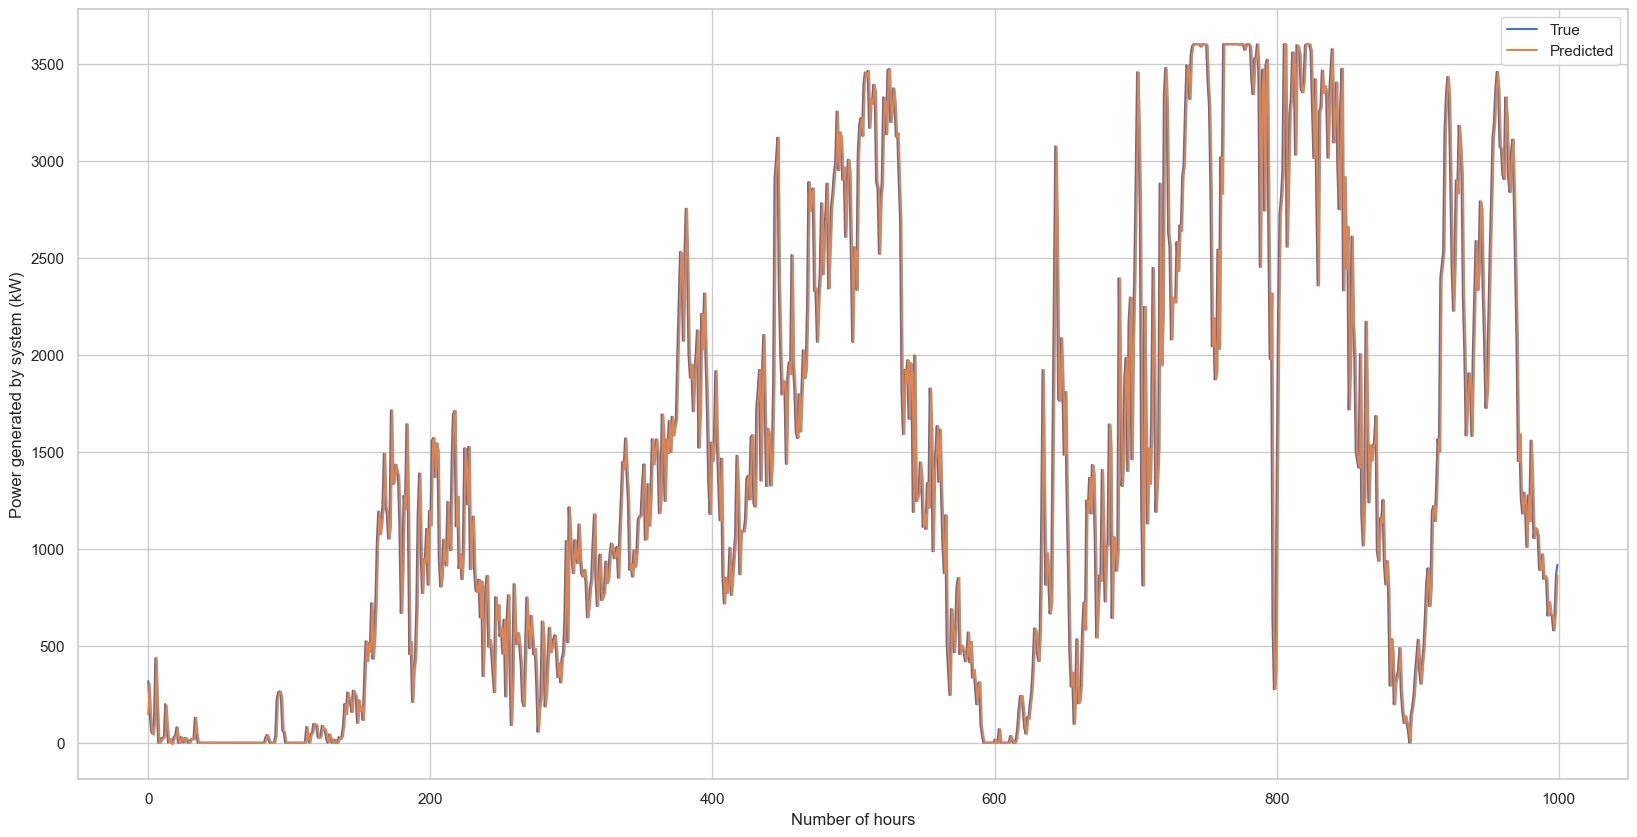

In [108]:
# line plot of observed vs predicted
sns.set_style("whitegrid")
pyplot.figure(figsize=(20,10))
pyplot.plot(expectations_plot[0:1000], label="True")
pyplot.plot(predictions_plot[0:1000], label="Predicted")
pyplot.legend(loc='upper right')
pyplot.xlabel("Number of hours")
pyplot.ylabel("Power generated by system (kW)")
pyplot.show()

In [98]:
import pickle 

In [99]:
Pkl_Filename = "Wind_Energy_Analysis_and_Prediction_using_LSTM.pkl" 

In [100]:
with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(lstm_model, file)

In [101]:
with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

Pickled_LR_Model

In [102]:
predictions.mean()

1892.0570070588342

In [103]:
df.mean()

Theoretical_Power_Curve (KWh)    1491.903057
dtype: float64

In [105]:
predictions

array([[ 145.56060414],
       [ 304.50864307],
       [ 150.66470303],
       ...,
       [1786.47989276],
       [2776.88365776],
       [3024.57856676]])